In [44]:
import pandas as pd
import os
from pathlib import Path
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
def plot_barchart(df_plot):
    vert_coord = df_plot.index.get_loc("2/13/20")
    hor_coord = df_plot.iloc[vert_coord].sum()
    
    fig, ax = plt.subplots(figsize=(10,10))
    df_plot.plot.bar(stacked=True, color=colors, figsize=(10,7), width=1, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    labels = [f"{label}: {str(get_last_value(label))} currently" for label in labels]
    ax.legend(handles, labels, prop={'size': 12})
    plt.axvline(vert_coord, 0.5, 0.6, label='pyplot vertical line', color='black')
    plt.text(vert_coord*0.8, hor_coord*1.5, 'Change in case criteria', fontsize=12)
    return fig

def get_last_value(label, df=df_plot):
    return df.iloc[-1][label]

## READ DATA

In [45]:
data_path = Path('COVID-19/csse_covid_19_data/csse_covid_19_time_series')

confirmed_df = pd.read_csv(data_path/'time_series_19-covid-Confirmed.csv')
death_df = pd.read_csv(data_path/'time_series_19-covid-Deaths.csv')
recovered_df = pd.read_csv(data_path/'time_series_19-covid-Recovered.csv')

In [46]:
confirmed_df['Province/State'] = confirmed_df['Province/State'].fillna(confirmed_df['Country/Region'])
death_df['Province/State'] = death_df['Province/State'].fillna(death_df['Country/Region'])
recovered_df['Province/State'] = recovered_df['Province/State'].fillna(recovered_df['Country/Region'])

regions = confirmed_df['Country/Region'].unique()
provinces = confirmed_df['Province/State'].unique()

confirmed_df.set_index('Province/State', inplace=True) 
death_df.set_index('Province/State', inplace=True)
recovered_df.set_index('Province/State', inplace=True)

## CREATE DIRECTORY STRUCTURE

In [49]:
for region in regions:
    try:
        os.mkdir(f'output/{region}')
    except FileExistsError:
        continue

## CREATE GAMMA CHART FOR TOTAL WORLD

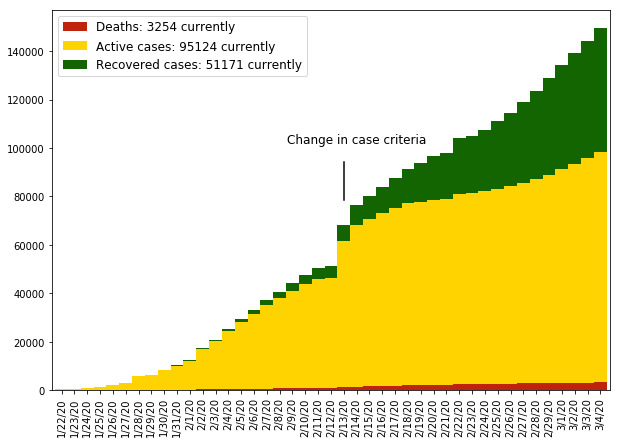

In [127]:
cols_to_drop = ['Country/Region', 'Lat', 'Long']

sum_confirmed = confirmed_df.drop(cols_to_drop, axis=1).sum(axis=0)
sum_death = death_df.drop(cols_to_drop, axis=1).sum(axis=0)
sum_recovered = recovered_df.drop(cols_to_drop, axis=1).sum(axis=0)

df = pd.concat([sum_confirmed, sum_death, sum_recovered], axis=1)
df.columns = ['Active cases', 'Deaths', 'Recovered cases']
df_plot = df[['Deaths', 'Active cases', 'Recovered cases']]
plot_barchart(df_plot).savefig('total-world.png')

## CREATE GAMMA CHART FOR COUNTRIES/REGIONS

In [131]:
cols_to_drop = ['Lat', 'Long']

grouped_confirmed = confirmed_df.reset_index().drop(cols_to_drop, axis=1).groupby('Country/Region').agg(pd.np.sum)
grouped_death = death_df.reset_index().drop(cols_to_drop, axis=1).groupby('Country/Region').agg(pd.np.sum)
grouped_recovered = recovered_df.reset_index().drop(cols_to_drop, axis=1).groupby('Country/Region').agg(pd.np.sum)

In [ ]:
for region in grouped_confirmed.index.unique():
    name = region
    df = pd.concat([grouped_confirmed.loc[region], grouped_death.loc[region], grouped_recovered.loc[region]], axis=1)
    df.columns = ['Active cases', 'Deaths', 'Recovered cases']
    df = df[['Deaths', 'Active cases', 'Recovered cases']]
    plot_barchart(df)

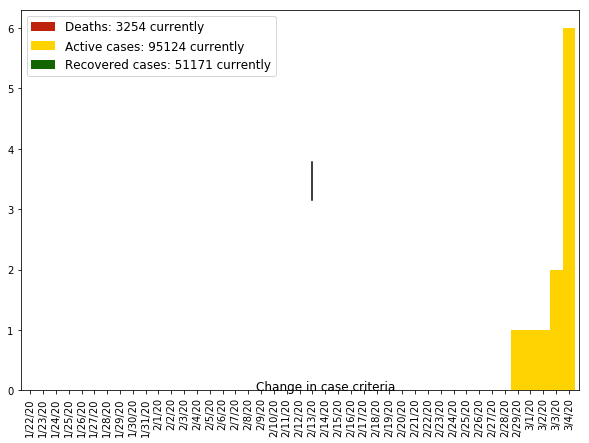

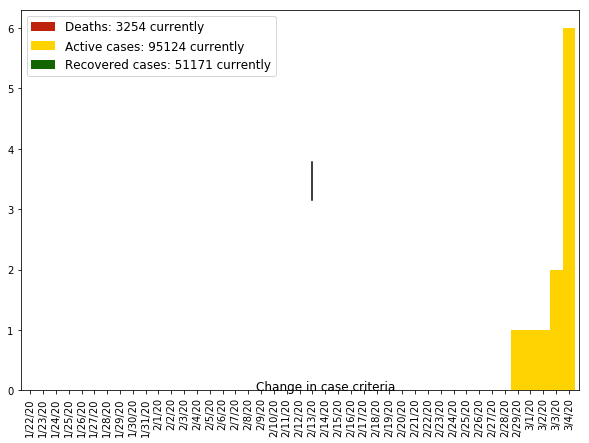

In [142]:
name = region
df = pd.concat([grouped_confirmed.loc[region], grouped_death.loc[region], grouped_recovered.loc[region]], axis=1)
df.columns = ['Active cases', 'Deaths', 'Recovered cases']
df = df[['Deaths', 'Active cases', 'Recovered cases']]
plot_barchart(df)

## CREATE AND SAVE GAMMA PLOTS PER PROVINCE/STATE

/home/kapronczaym/.local/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


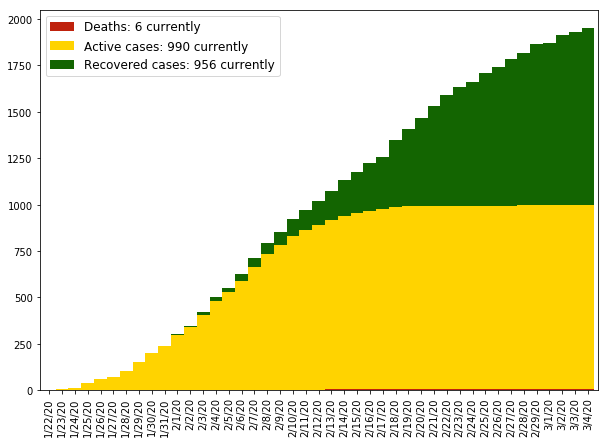

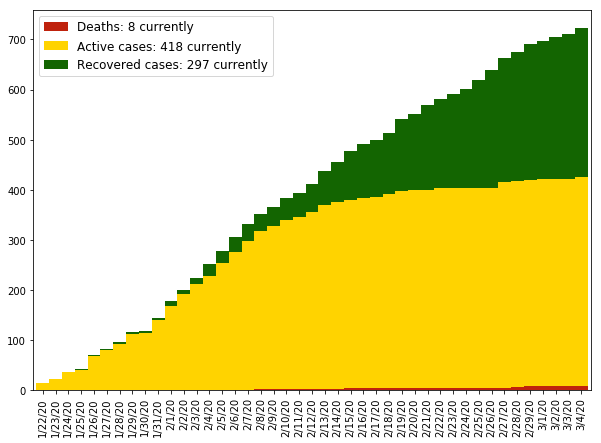

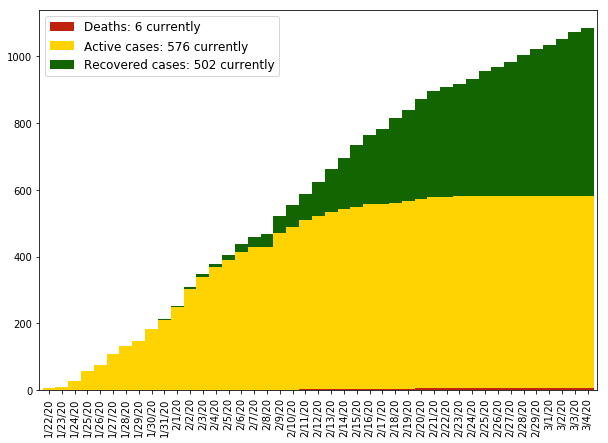

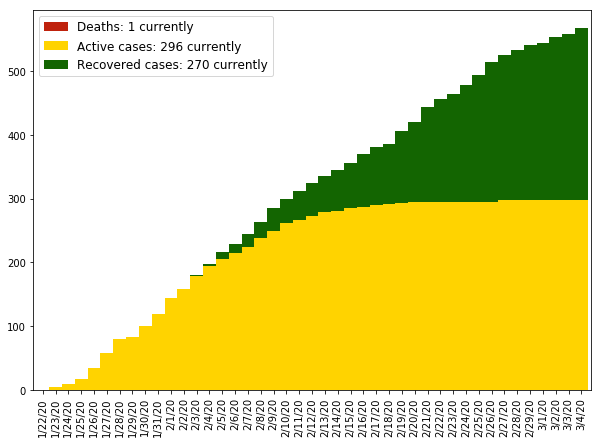

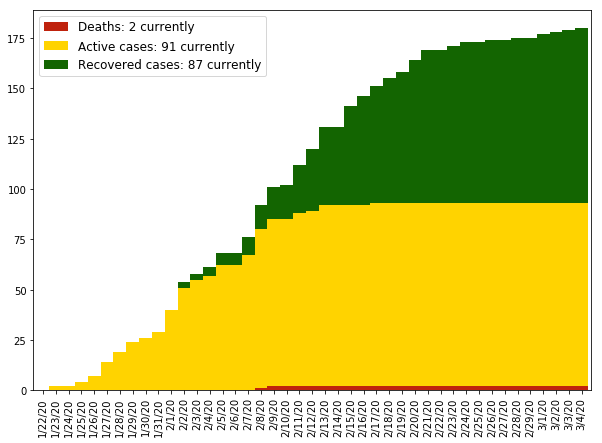

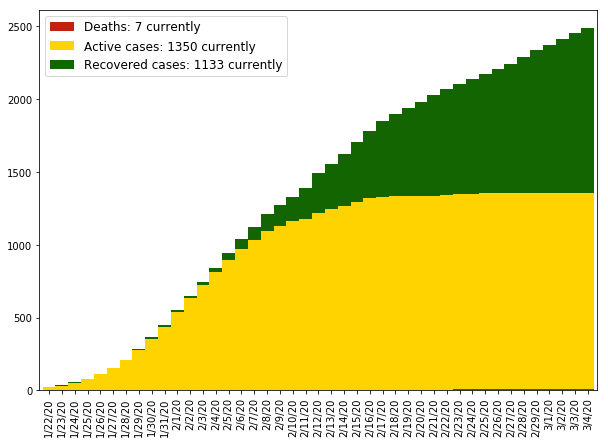

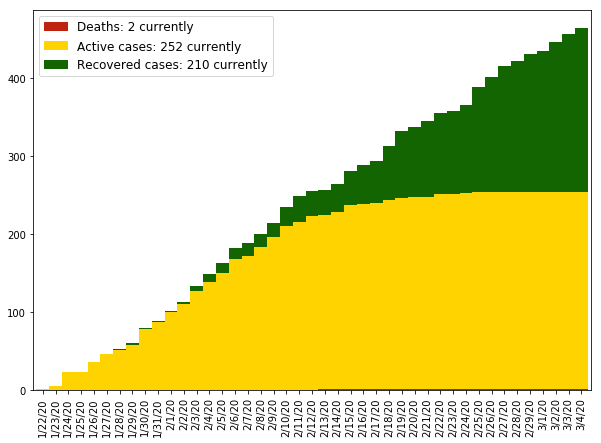

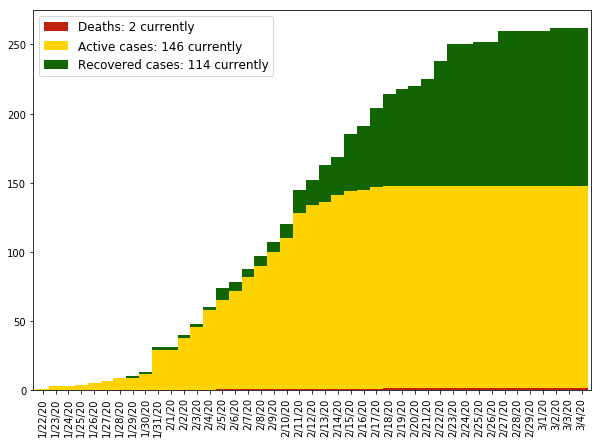

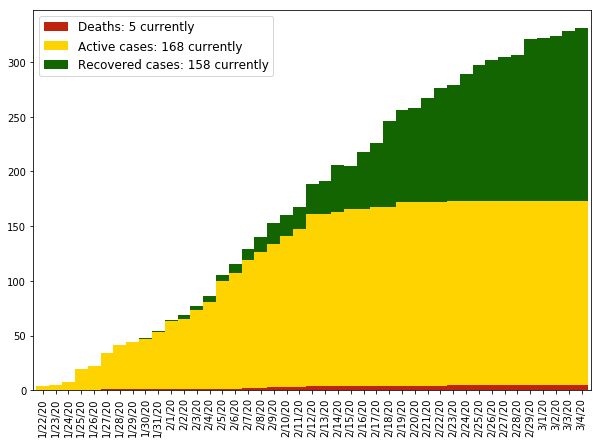

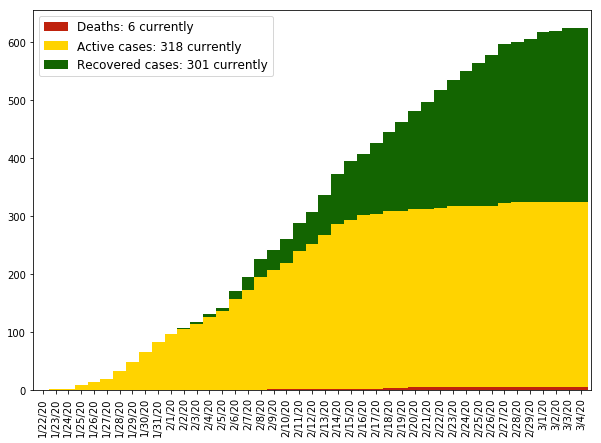

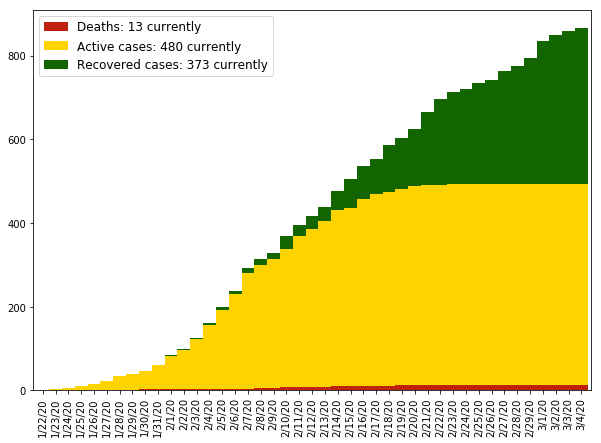

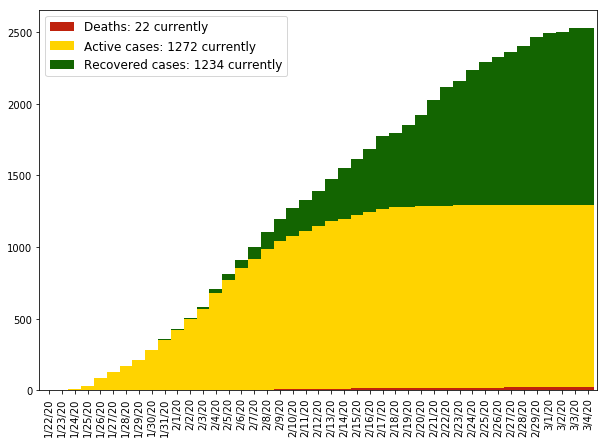

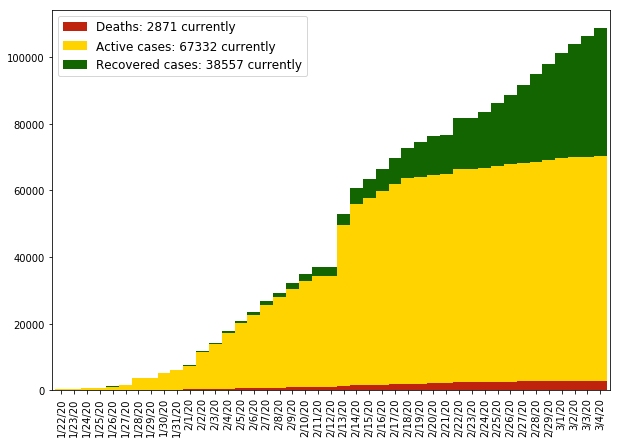

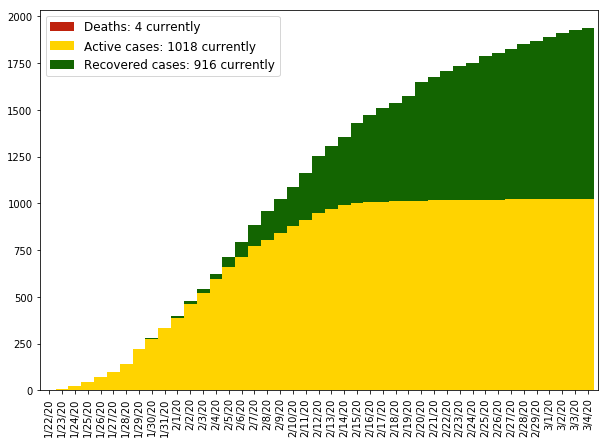

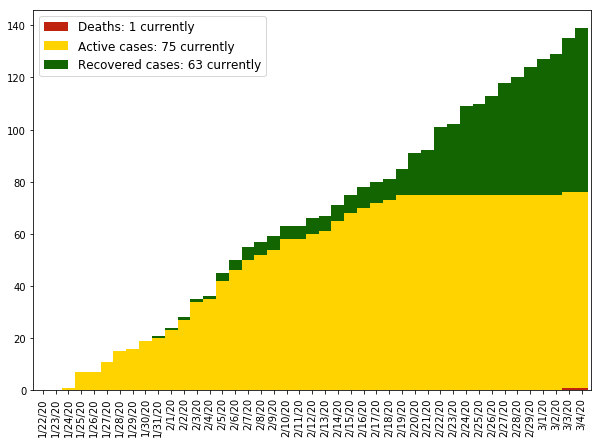

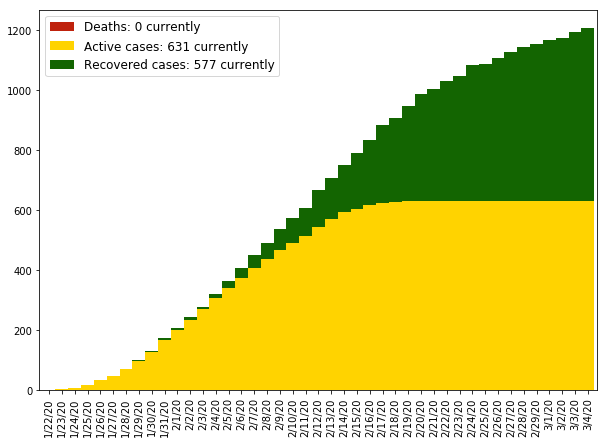

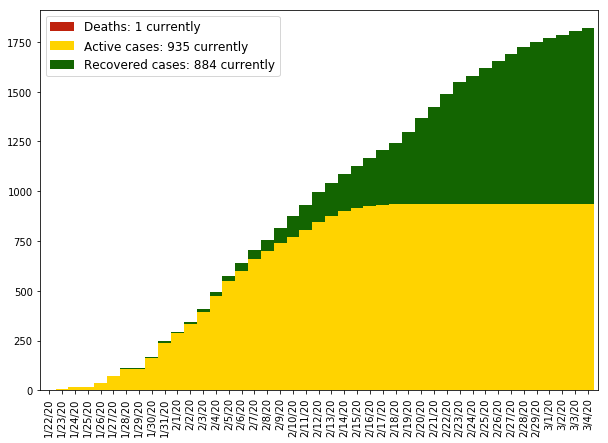

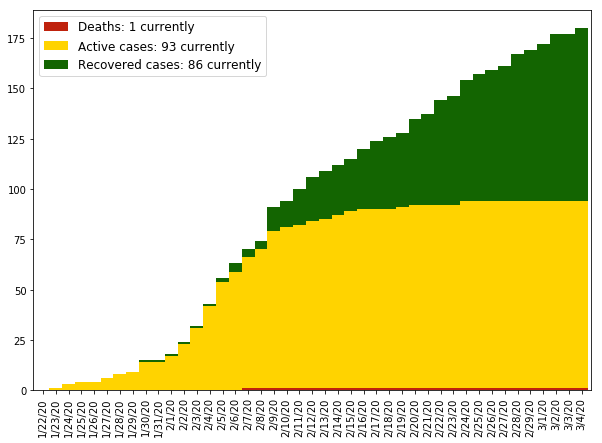

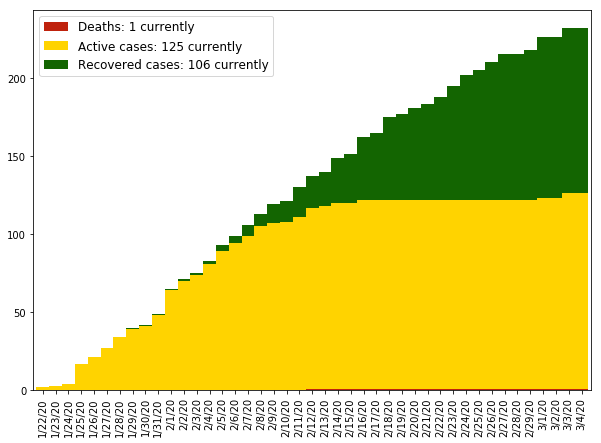

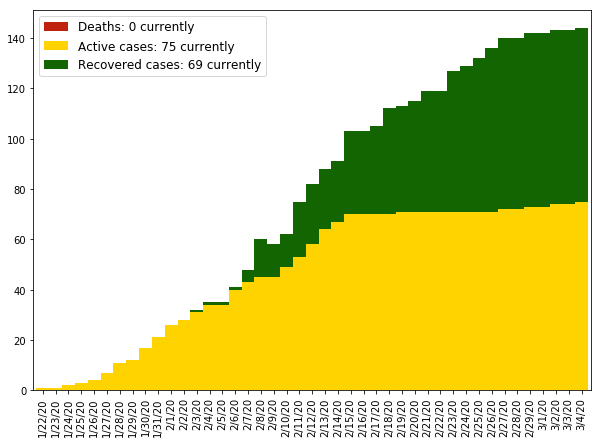

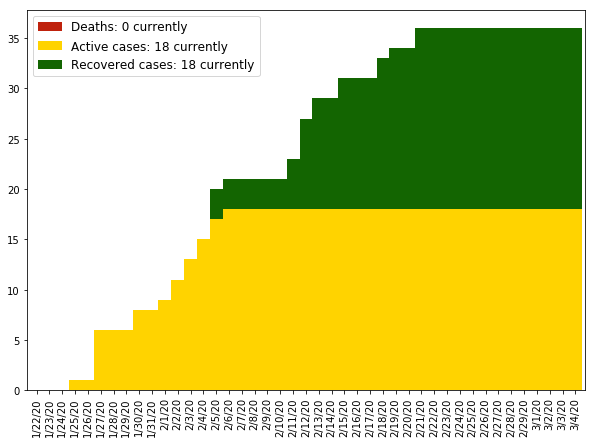

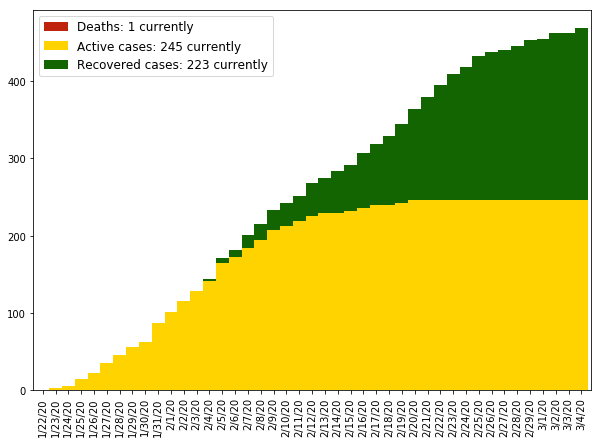

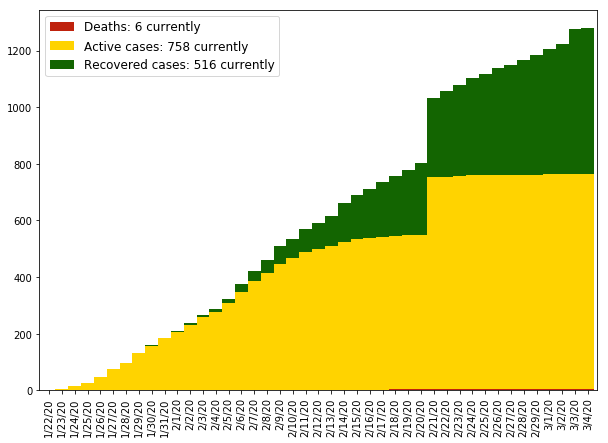

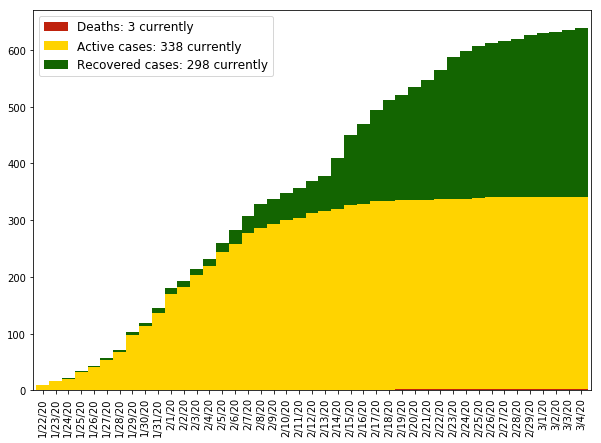

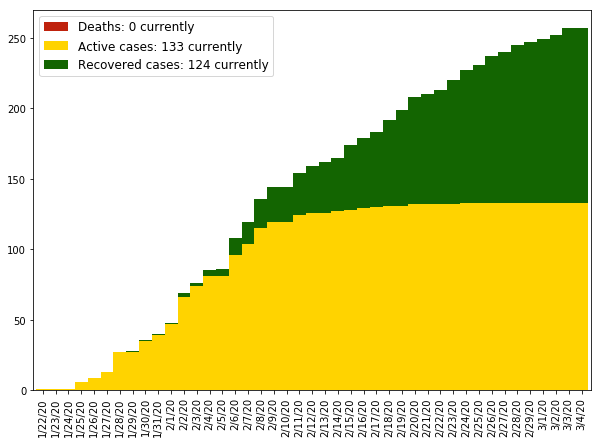

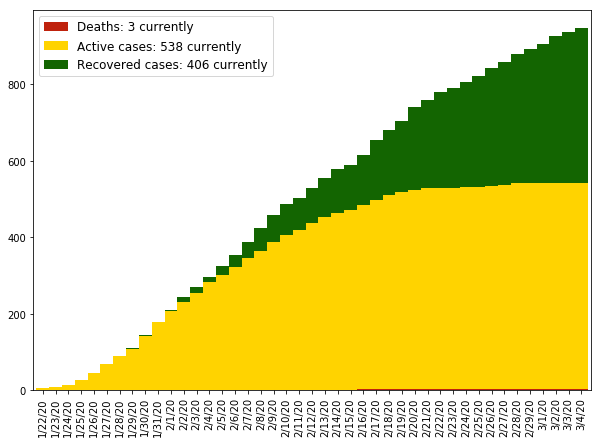

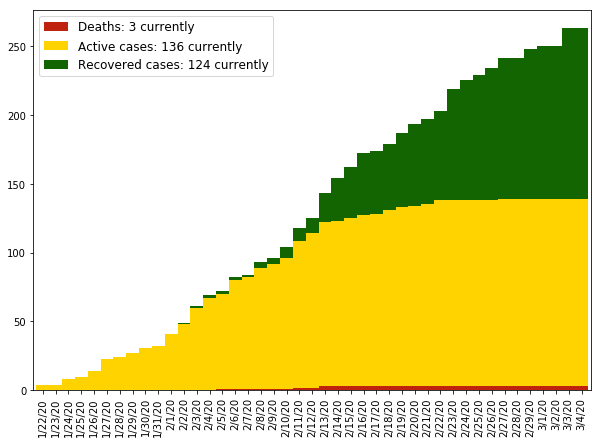

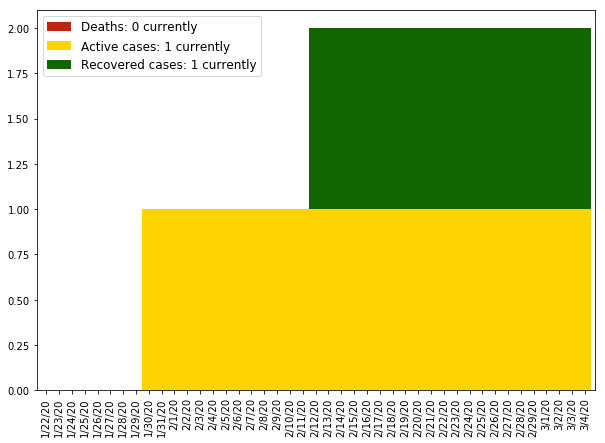

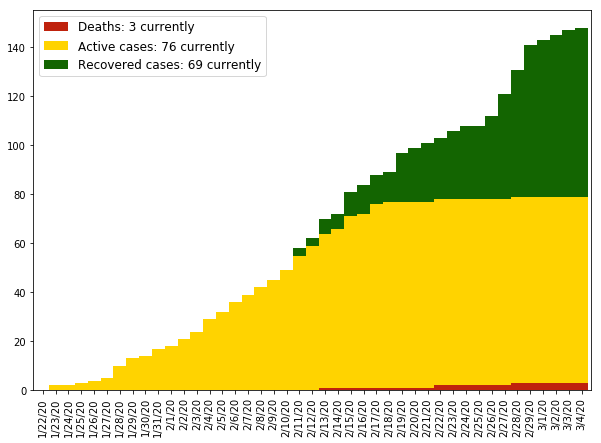

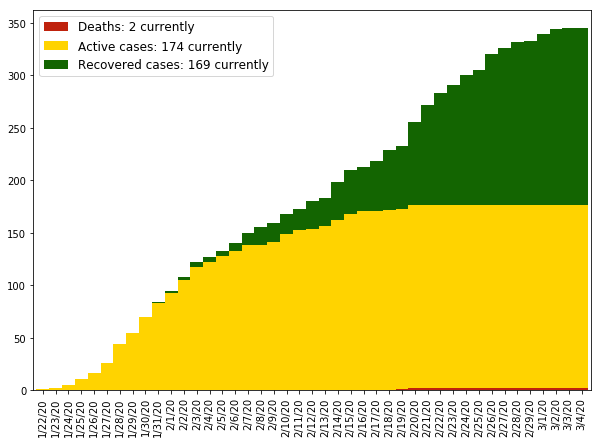

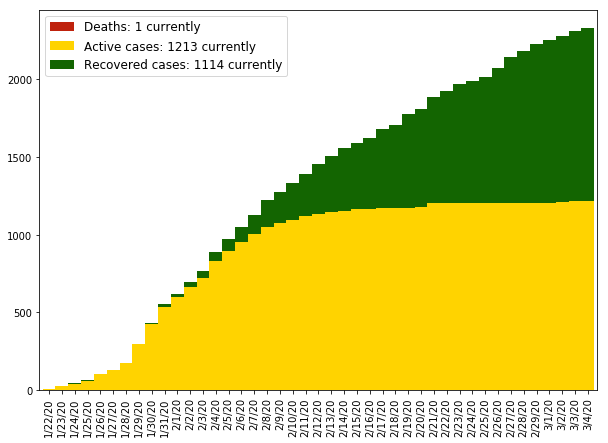

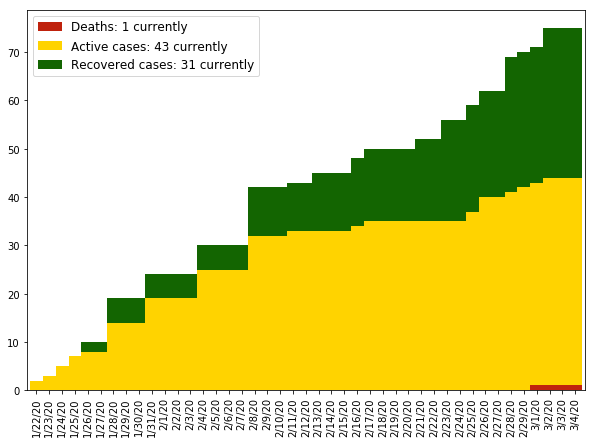

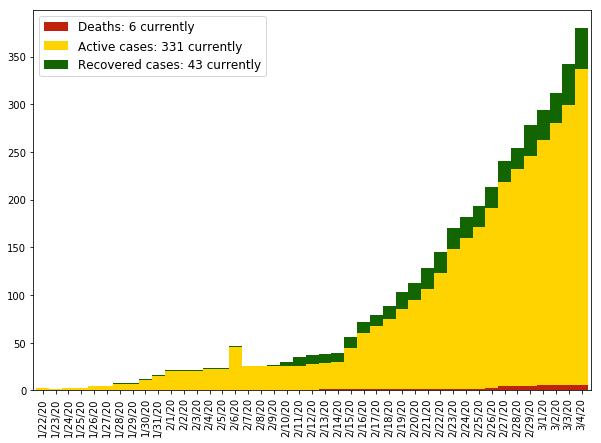

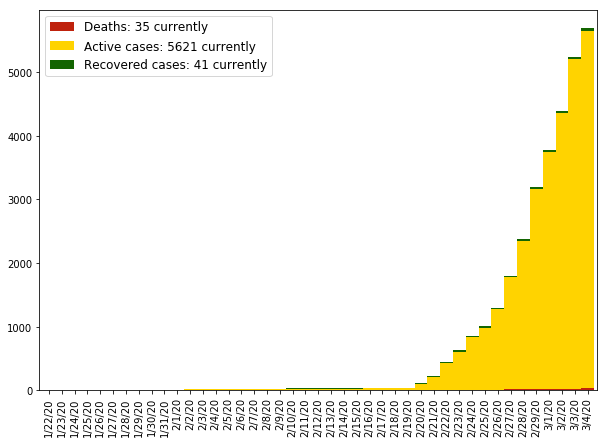

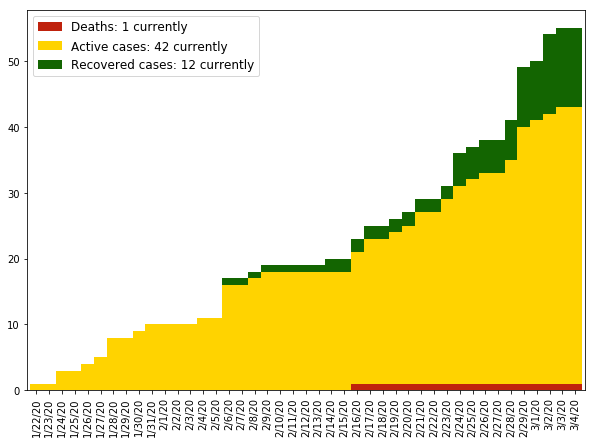

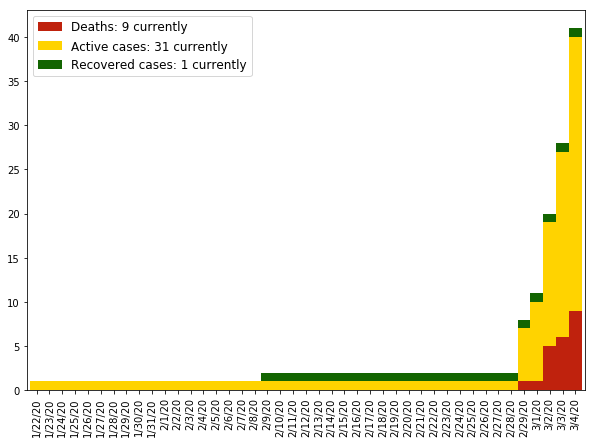

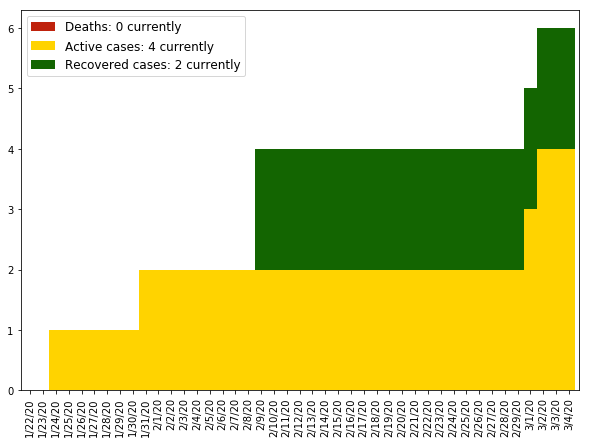

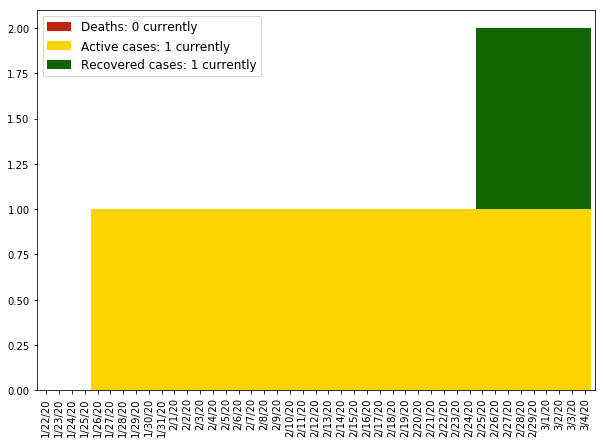

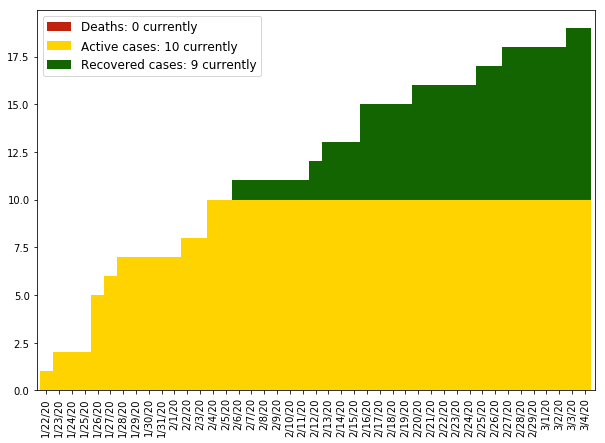

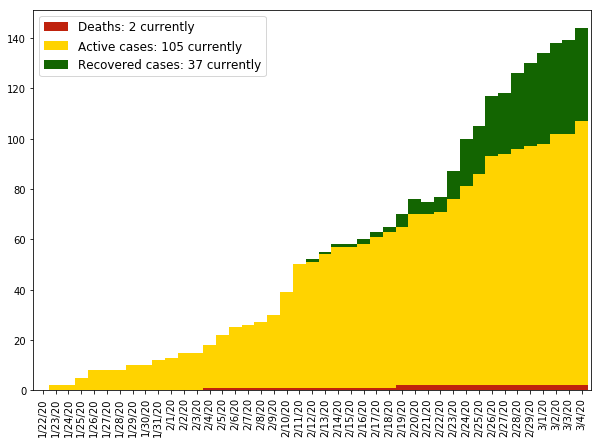

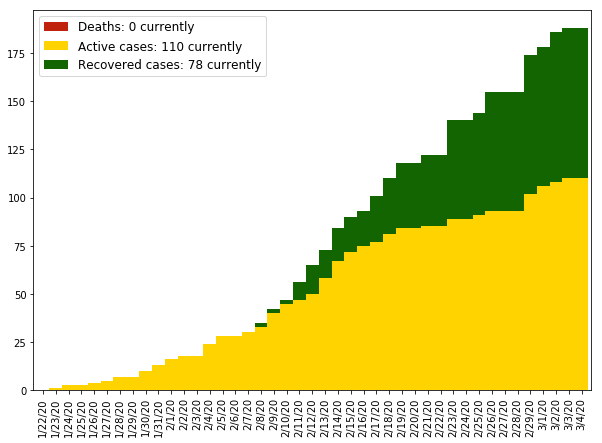

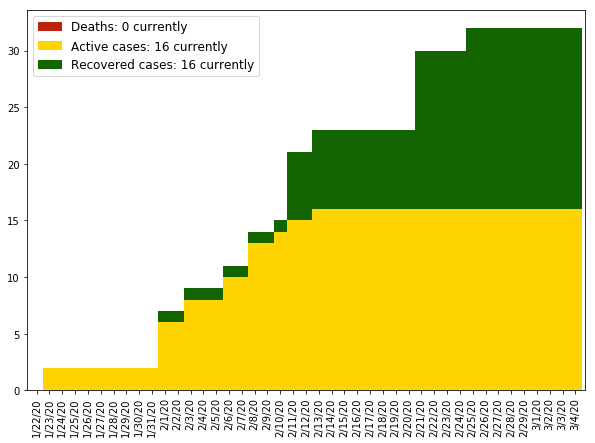

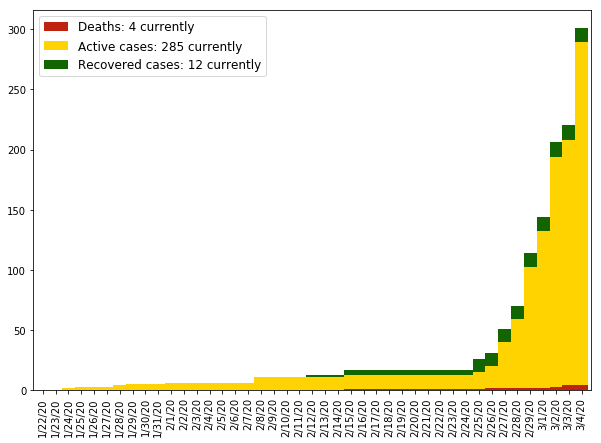

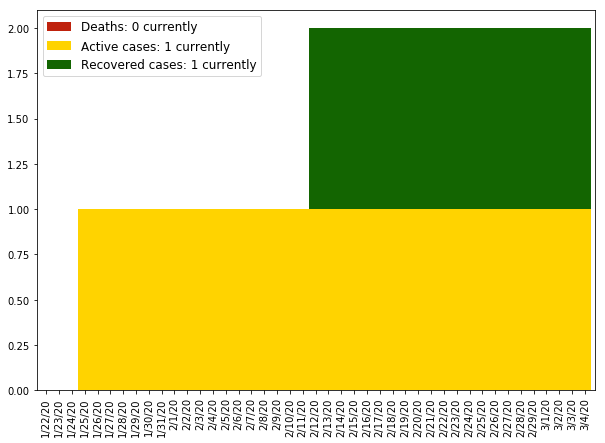

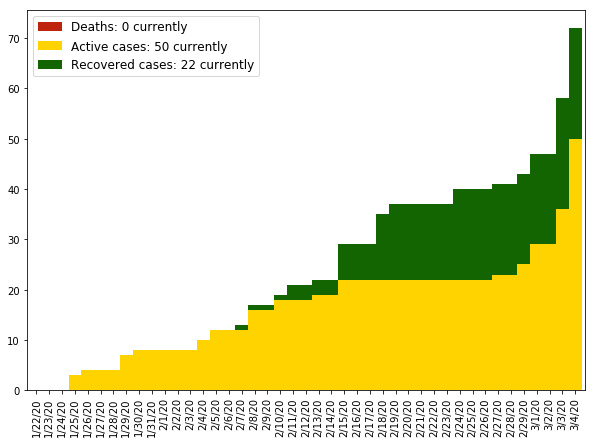

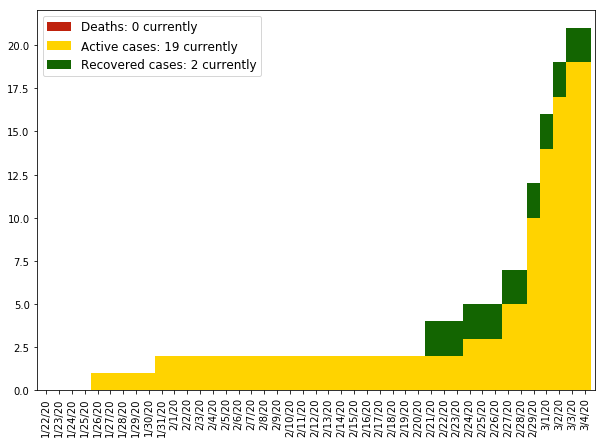

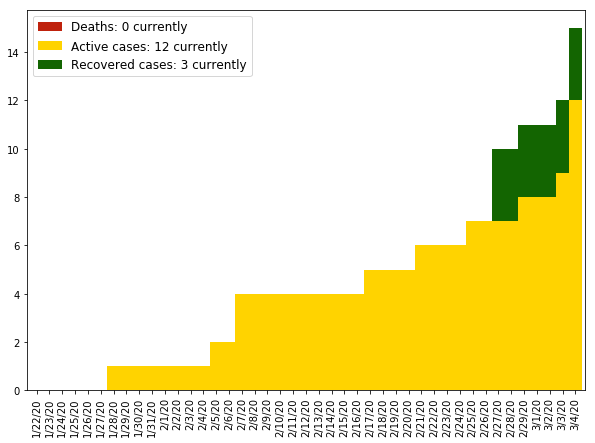

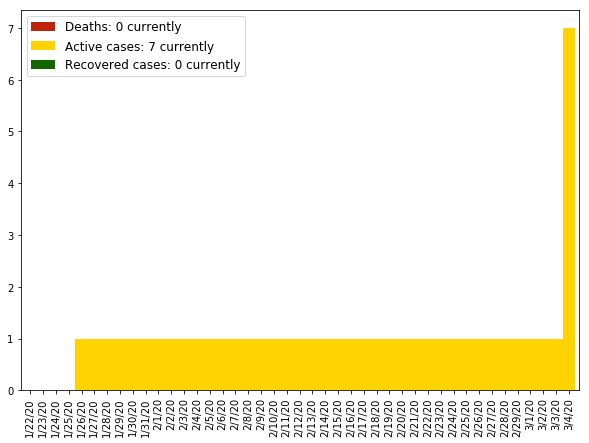

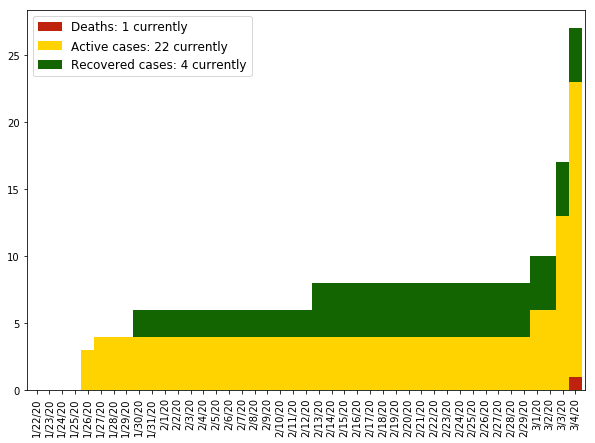

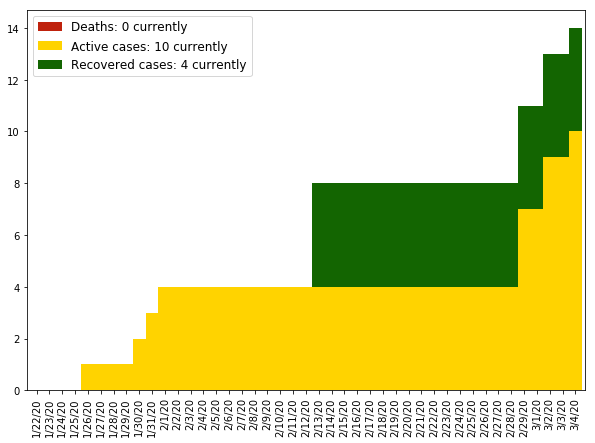

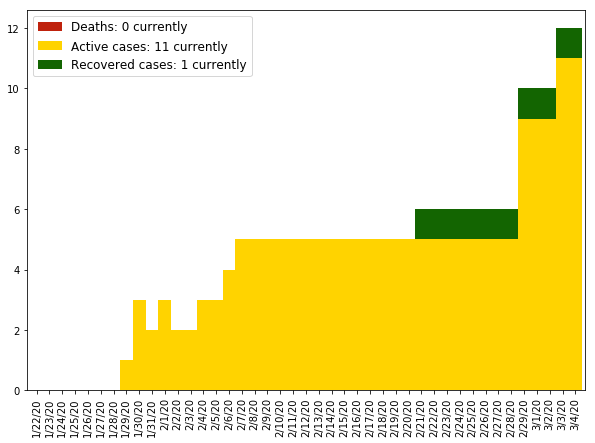

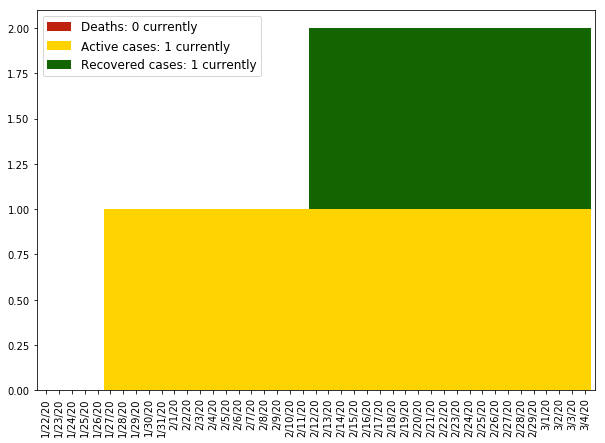

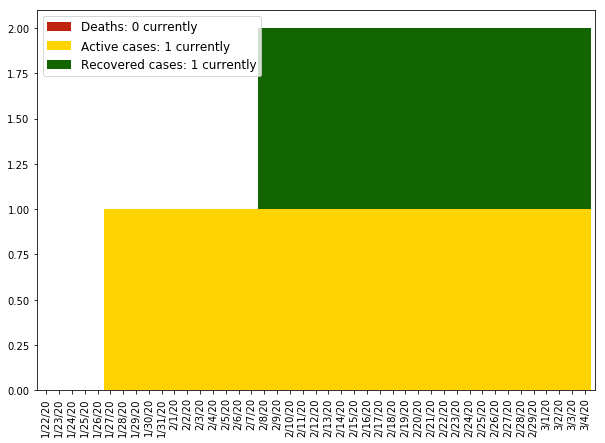

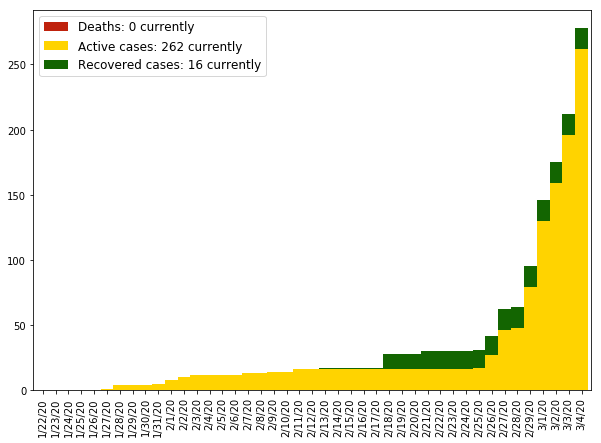

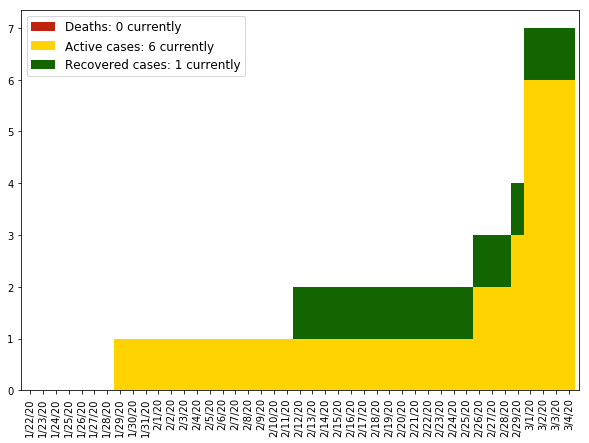

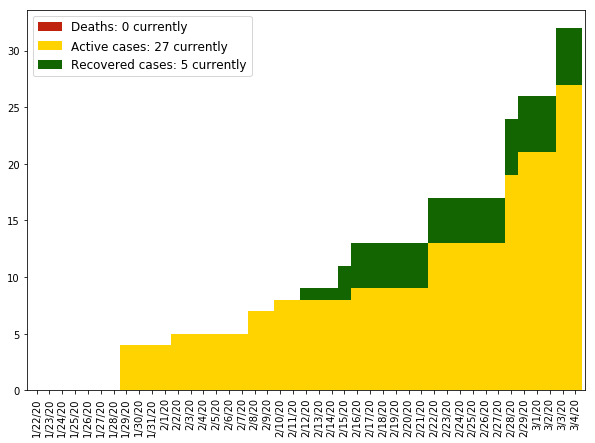

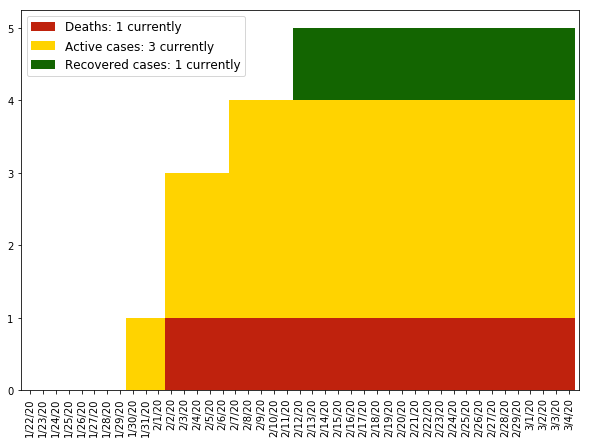

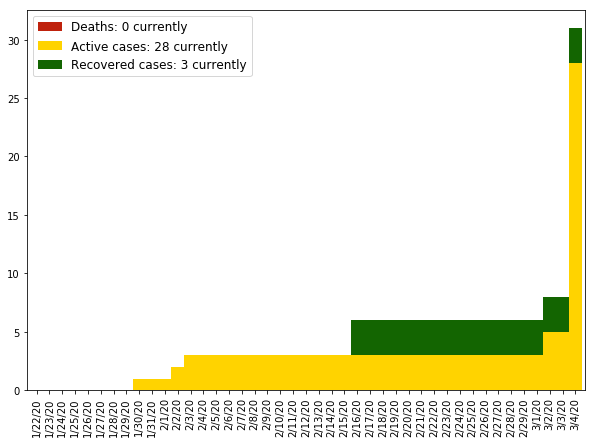

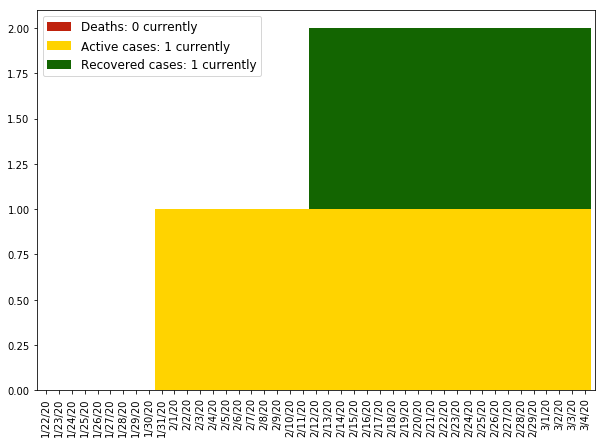

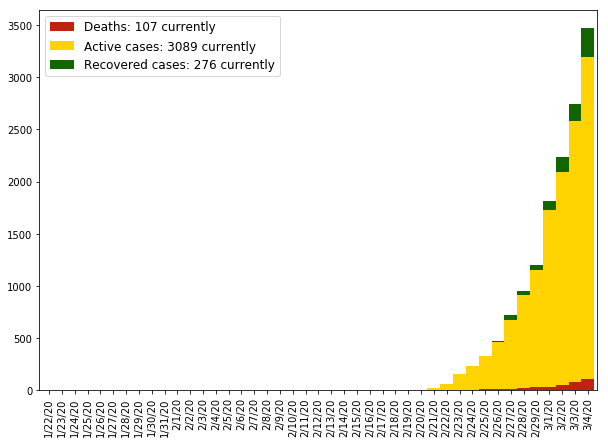

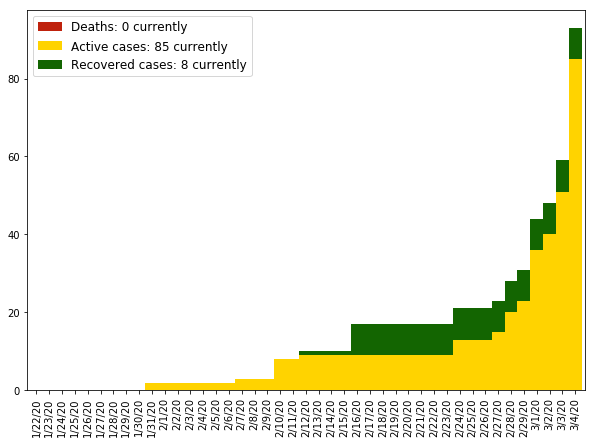

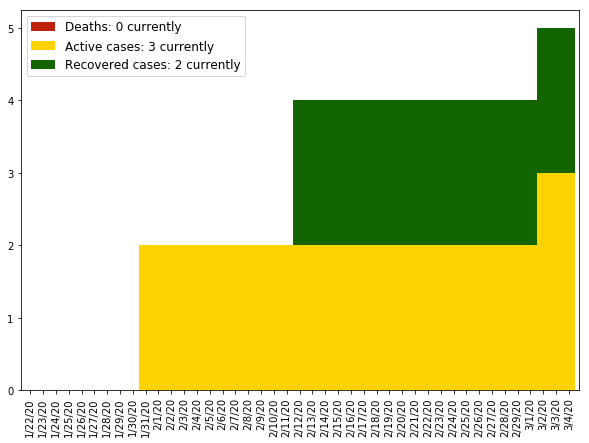

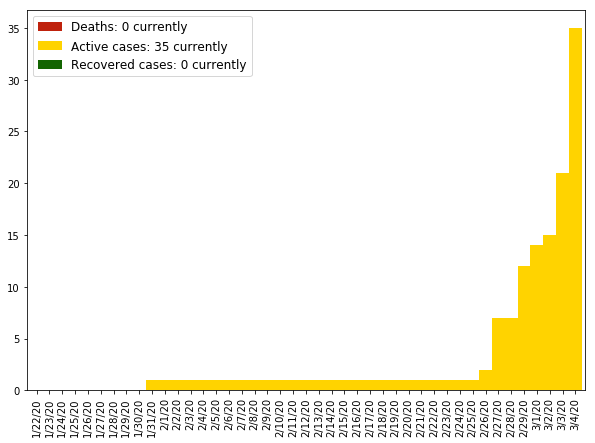

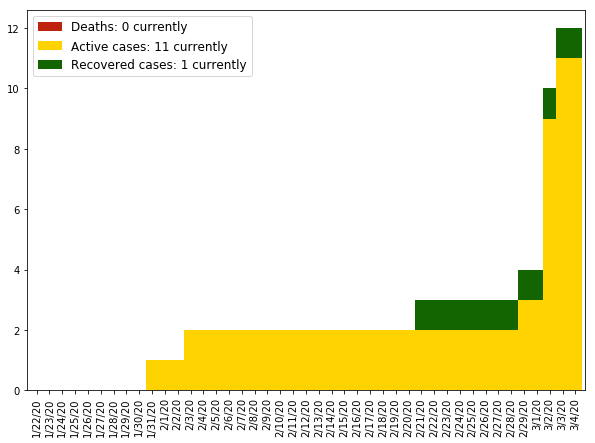

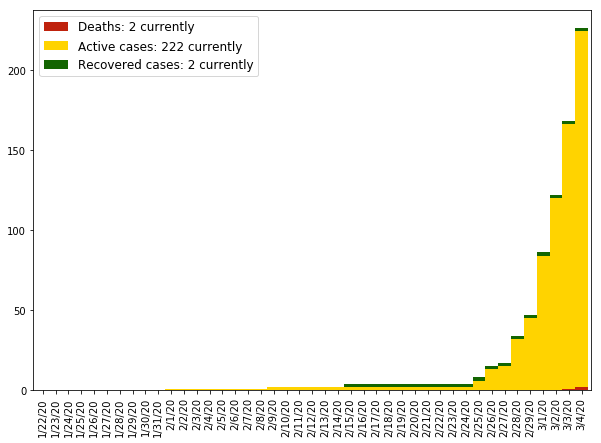

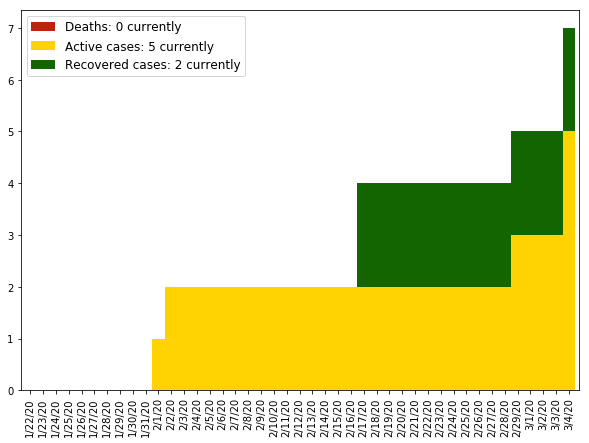

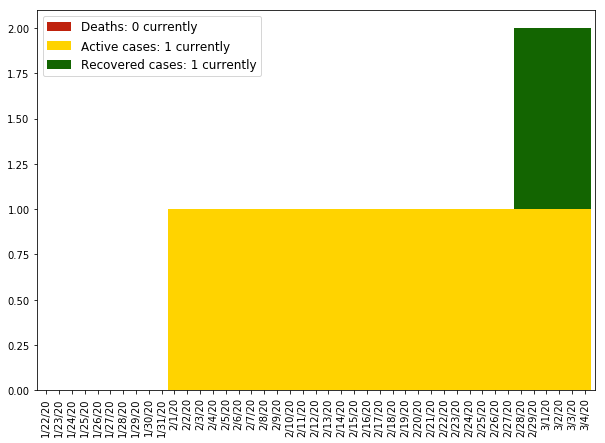

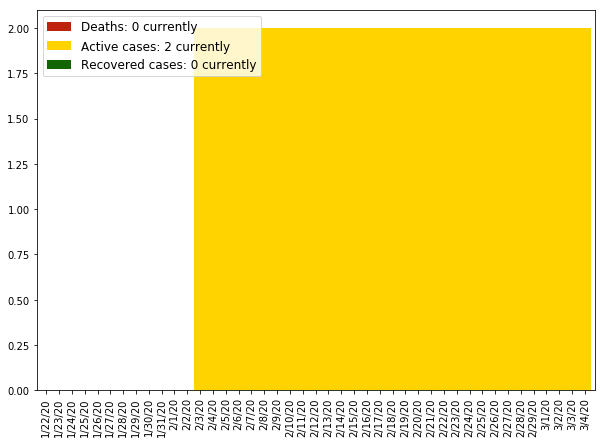

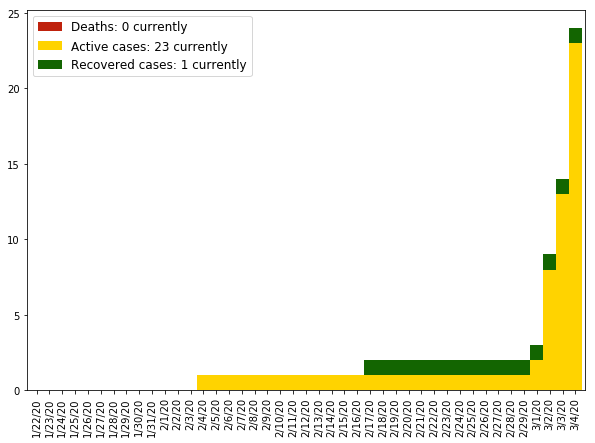

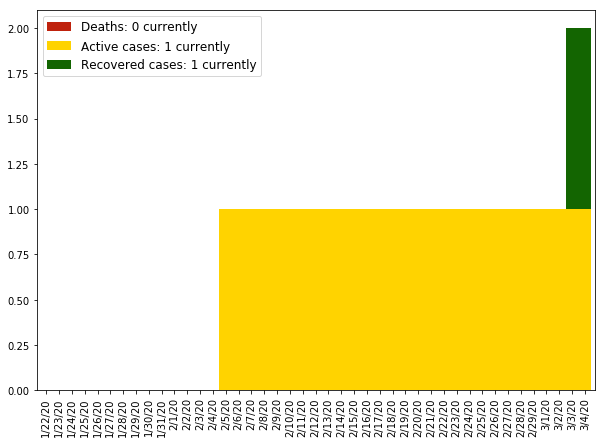

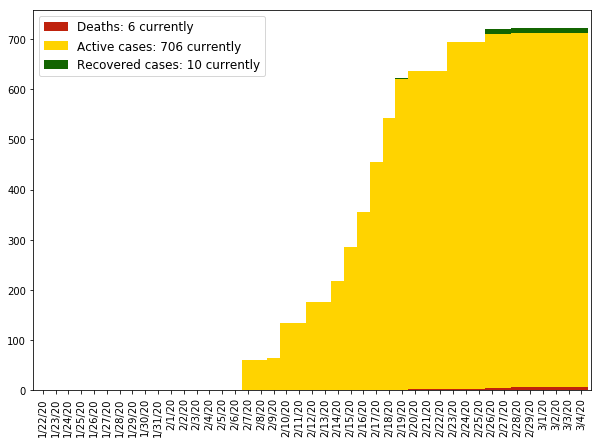

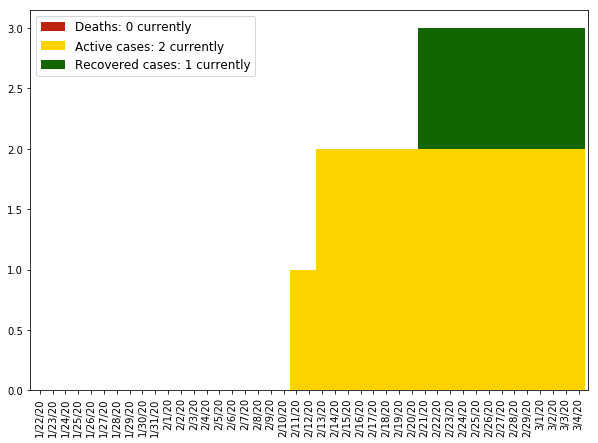

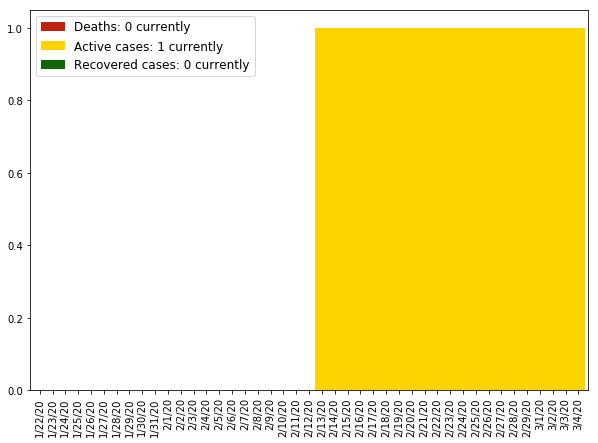

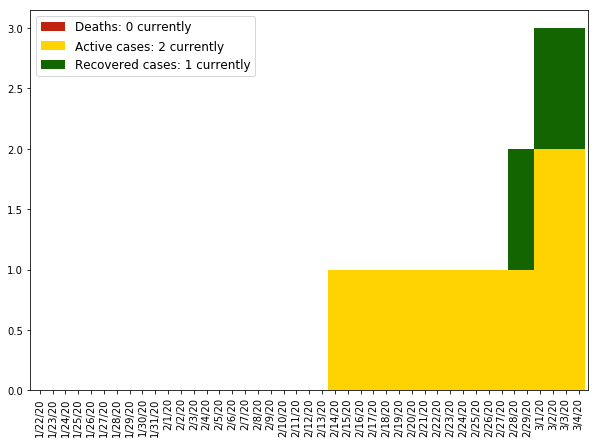

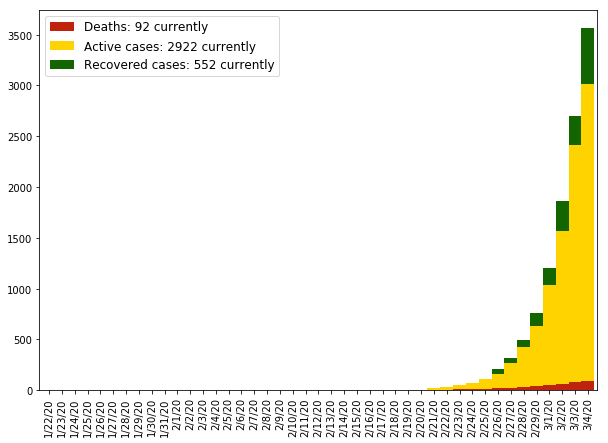

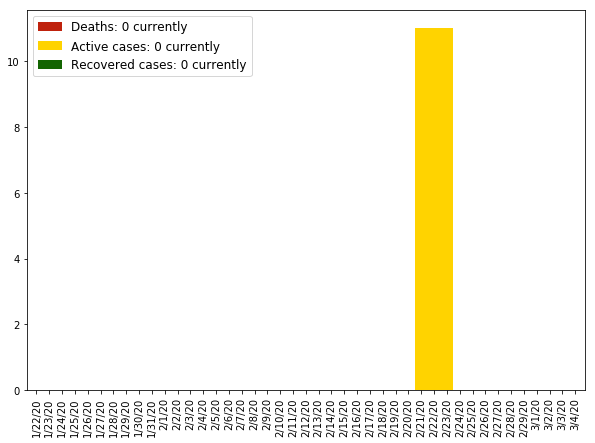

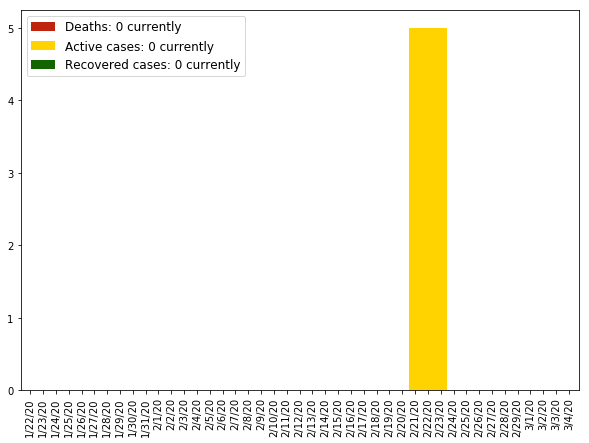

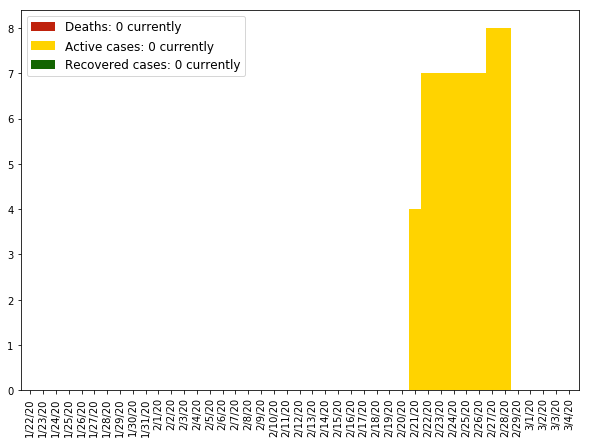

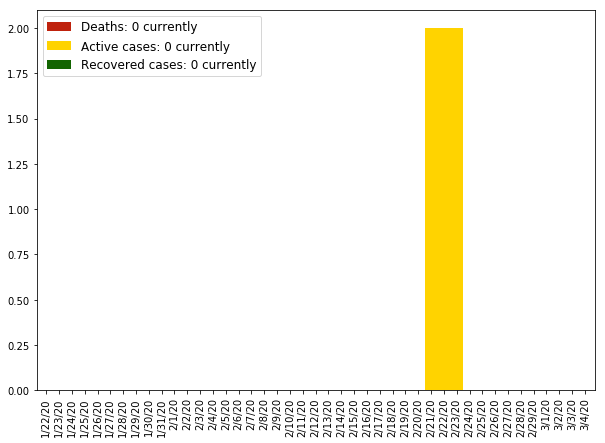

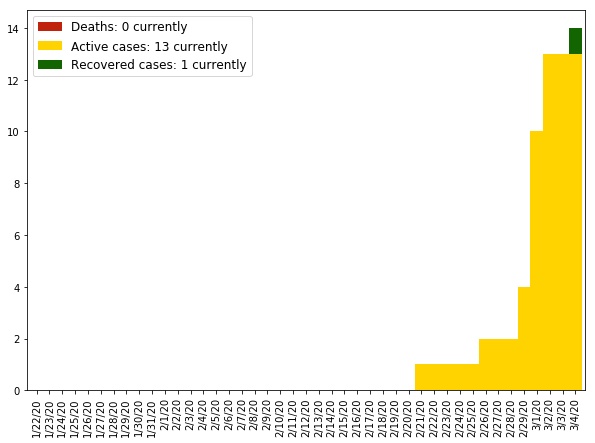

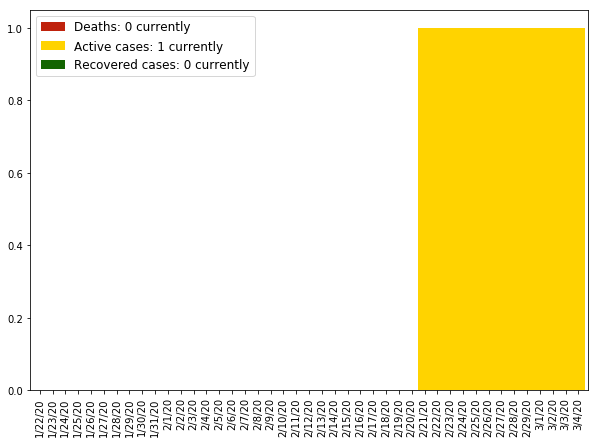

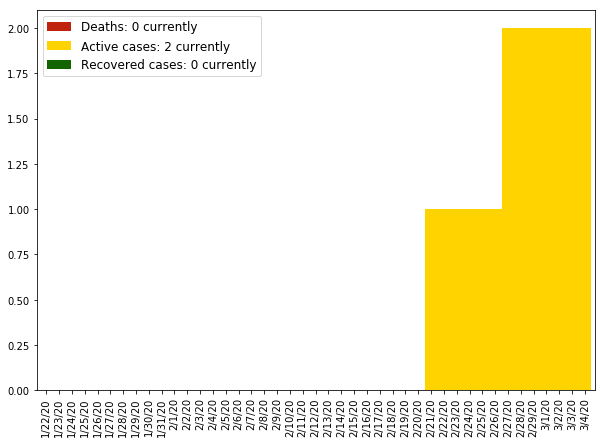

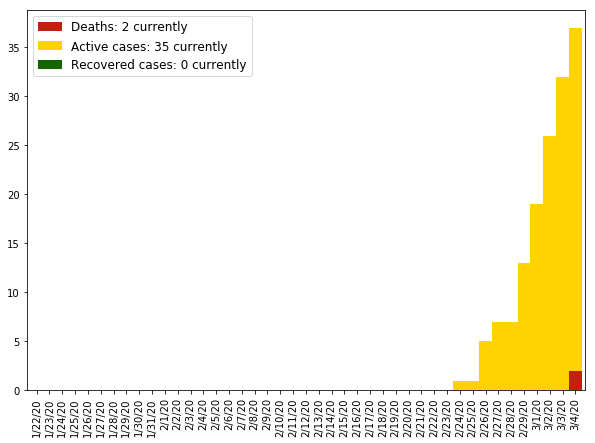

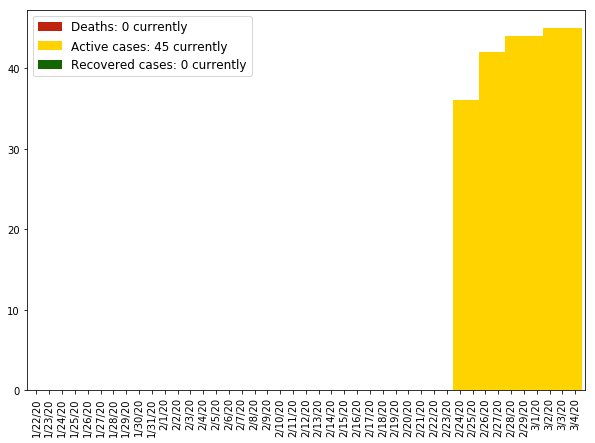

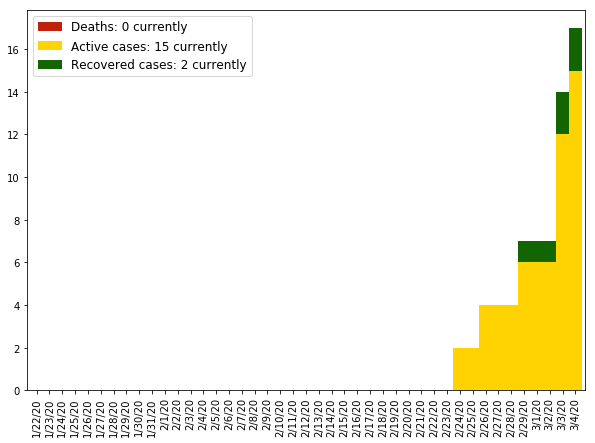

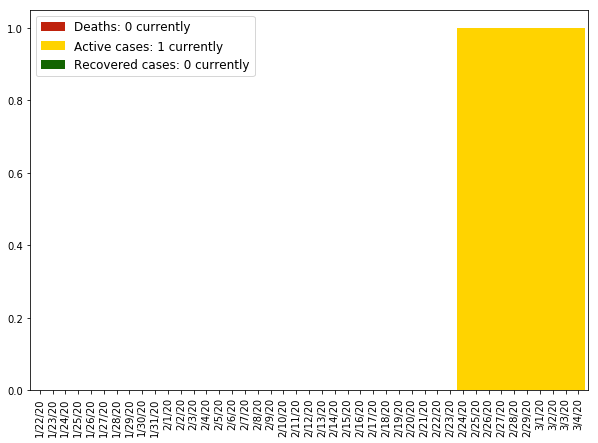

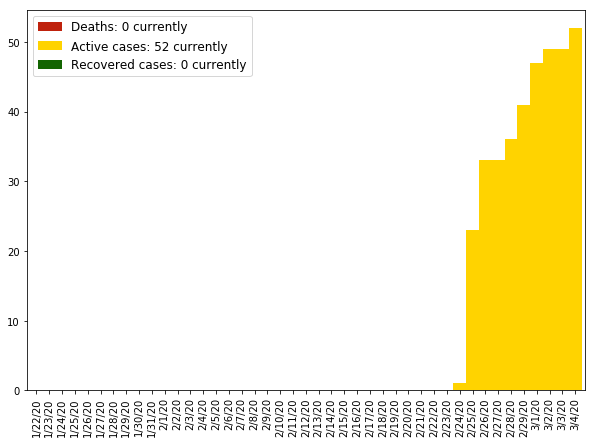

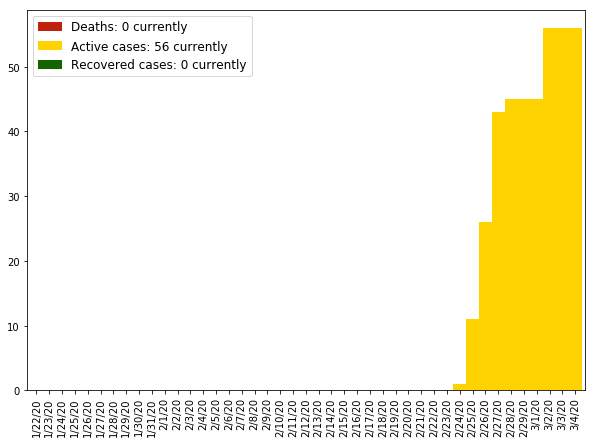

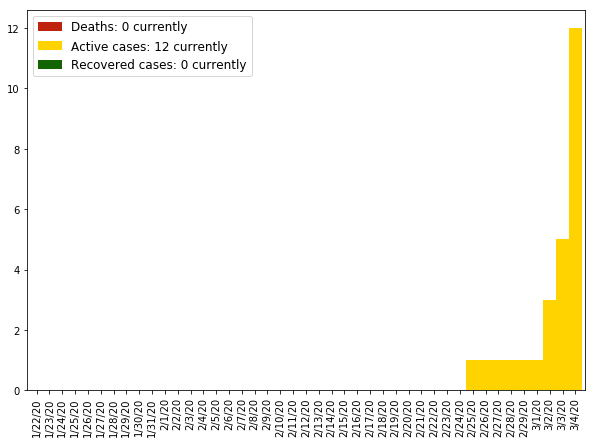

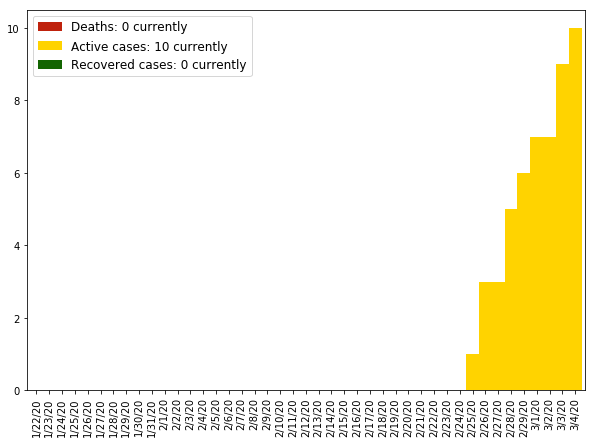

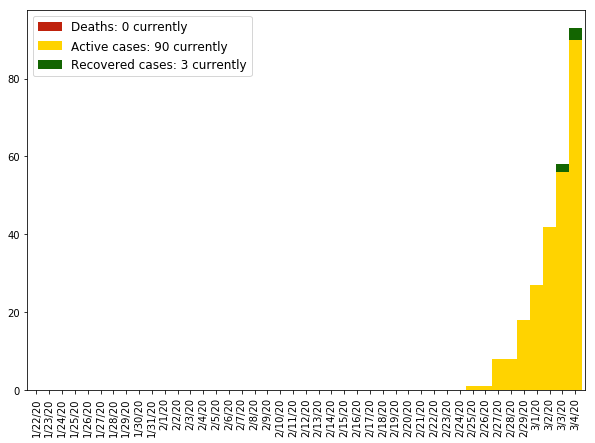

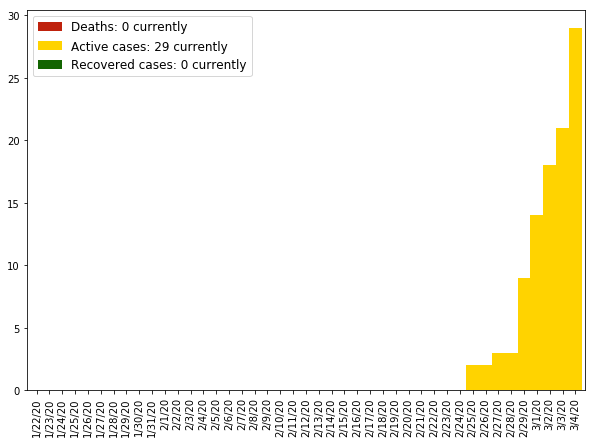

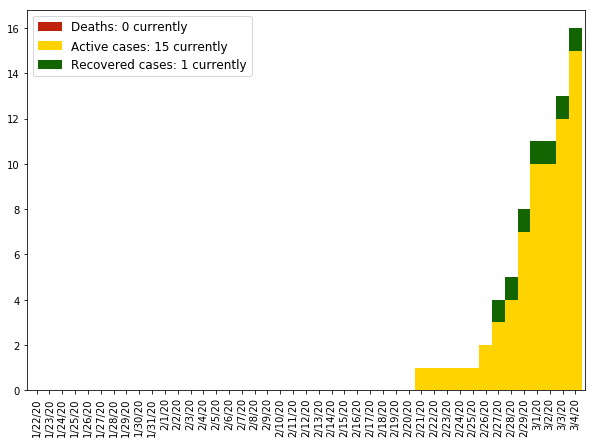

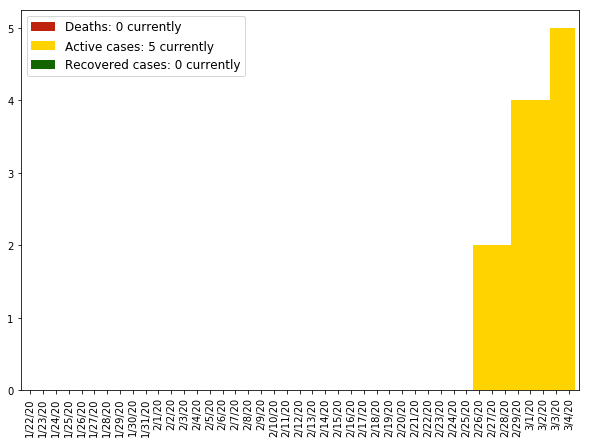

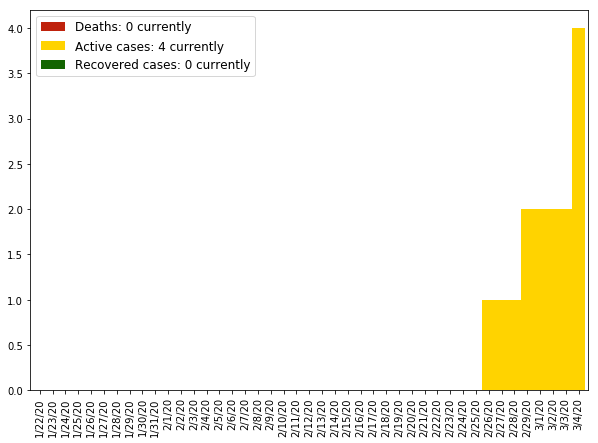

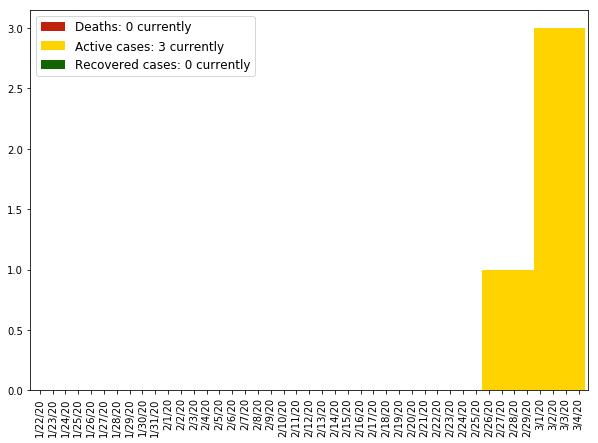

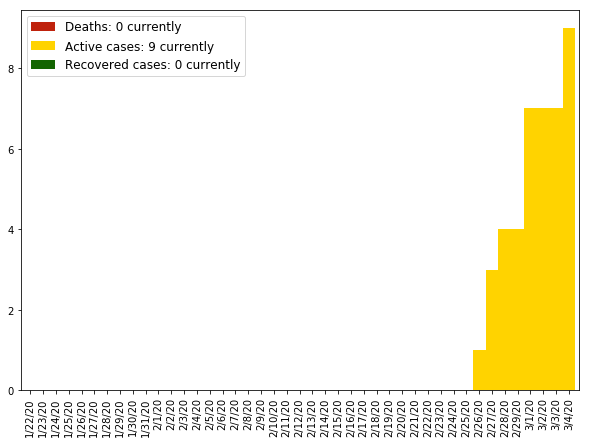

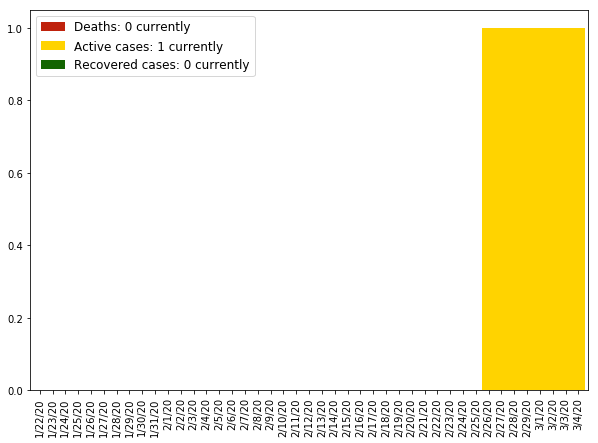

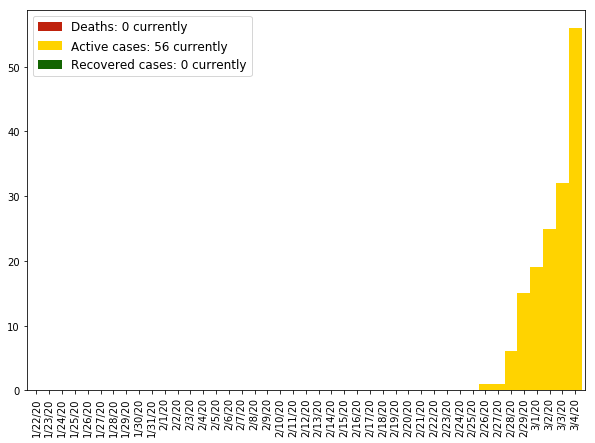

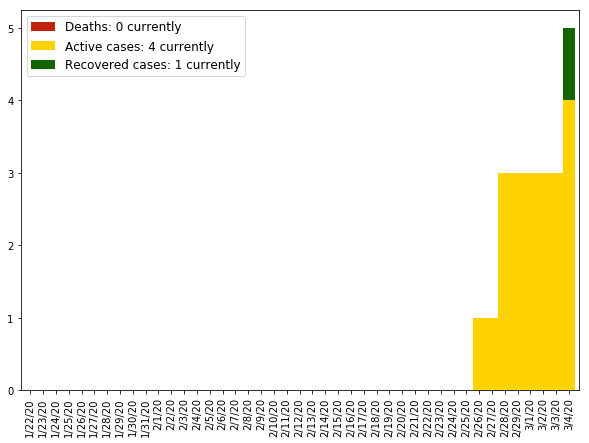

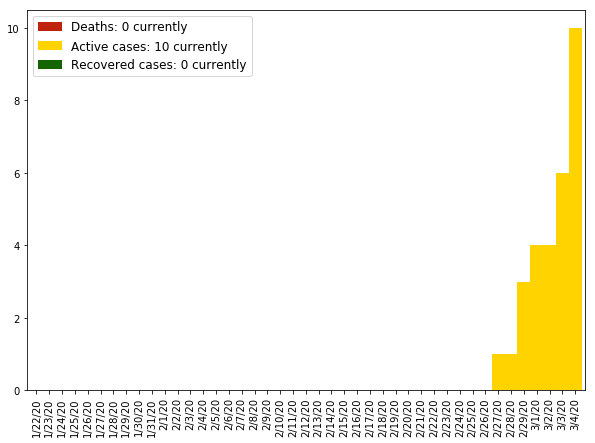

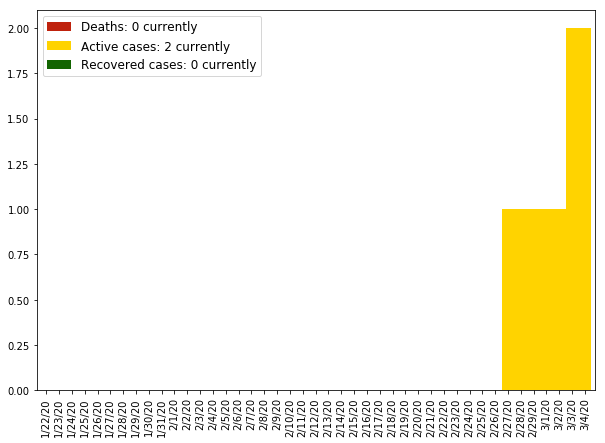

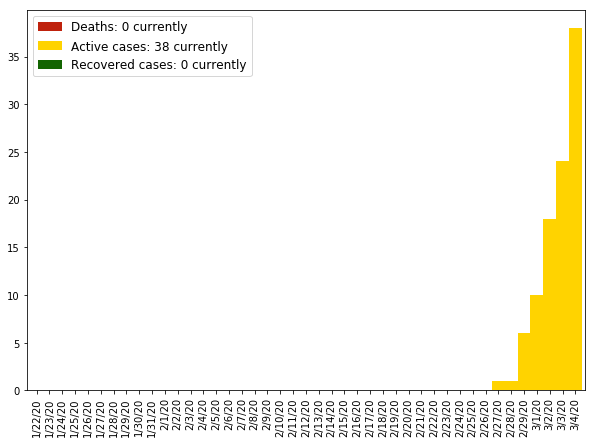

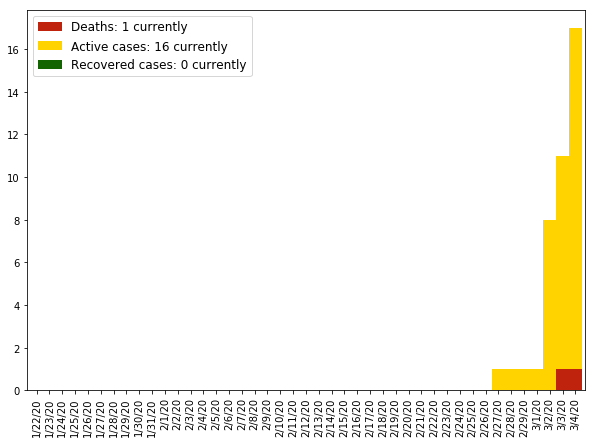

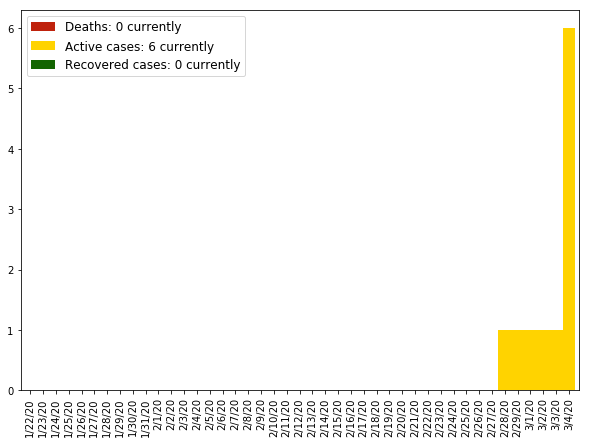

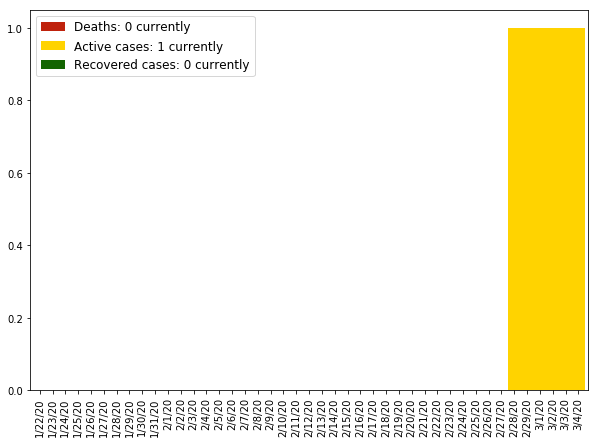

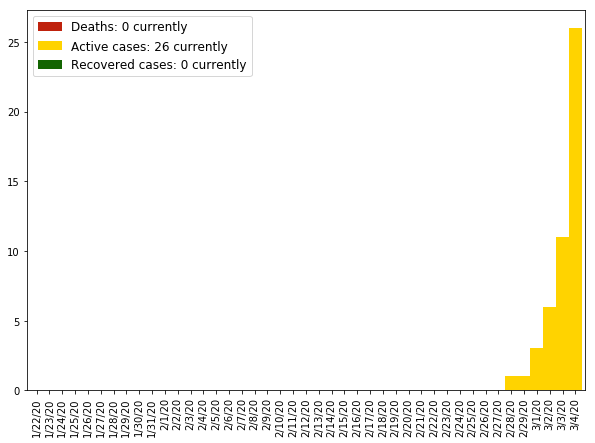

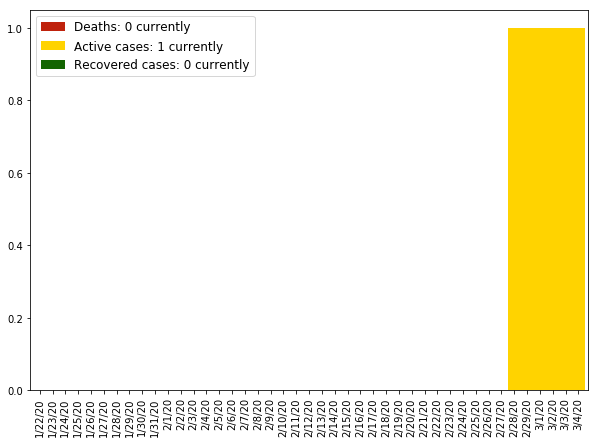

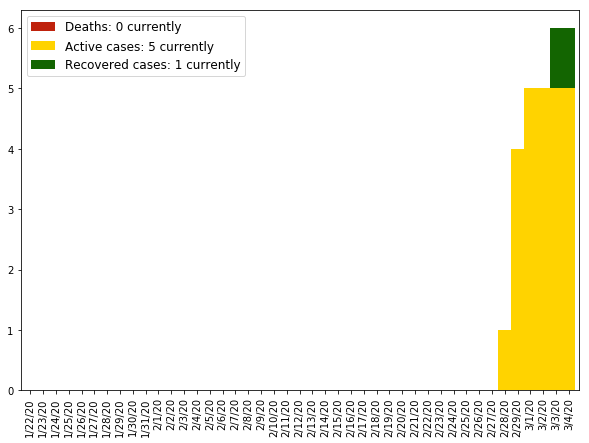

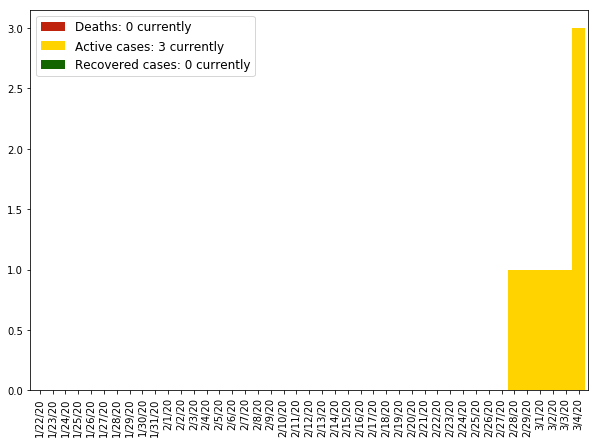

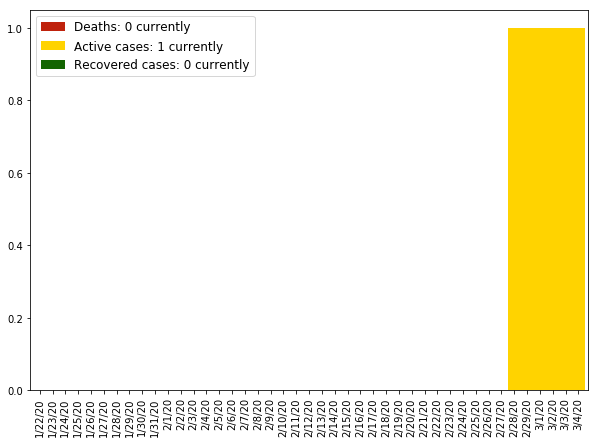

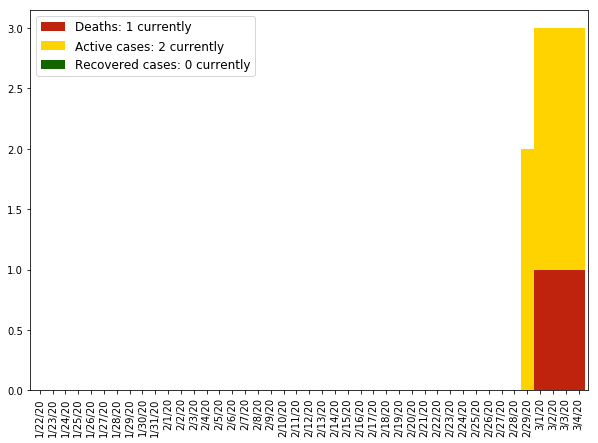

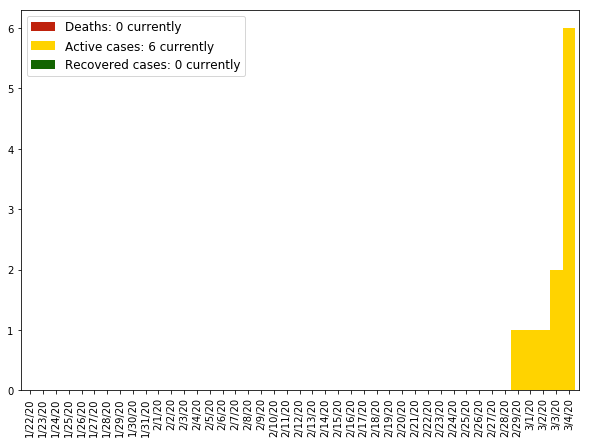

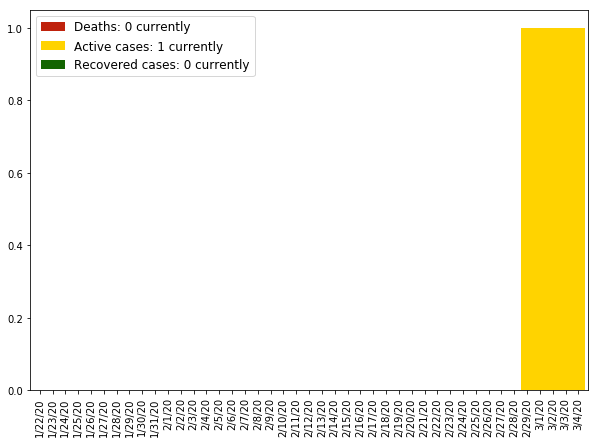

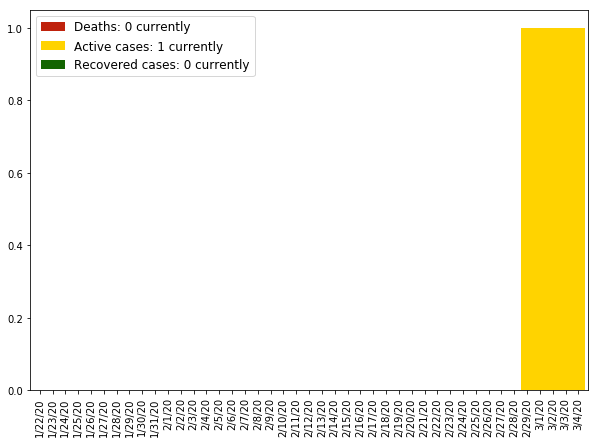

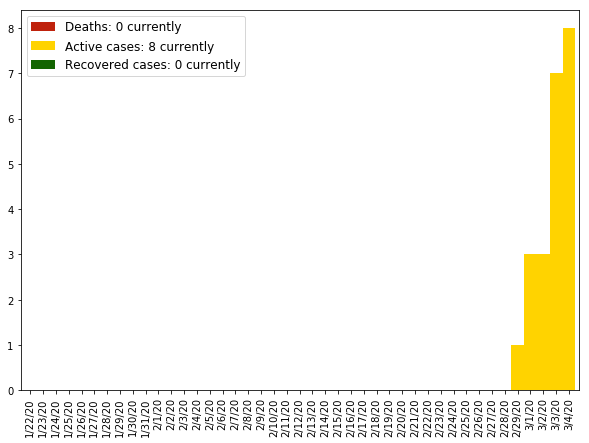

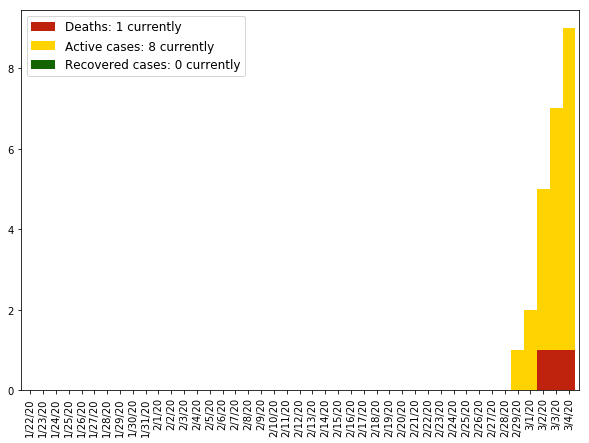

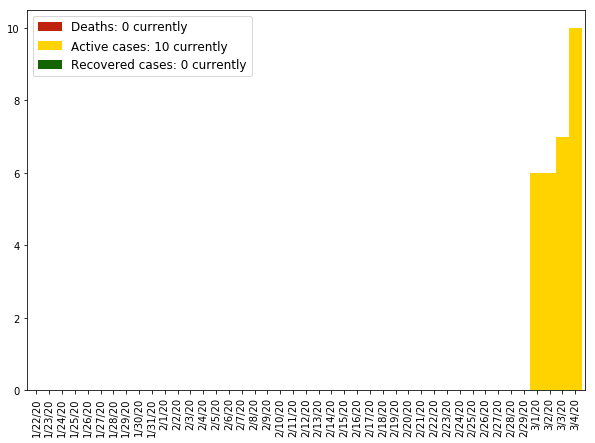

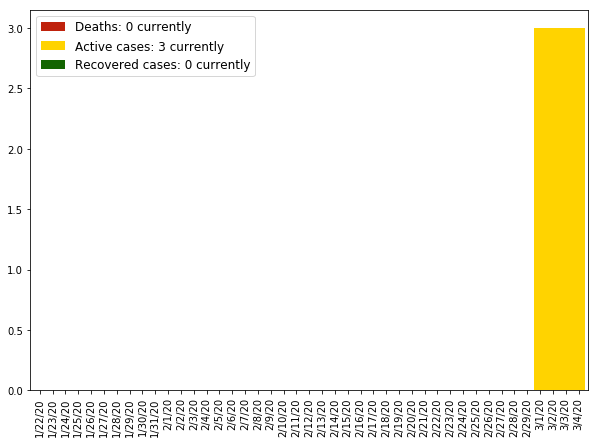

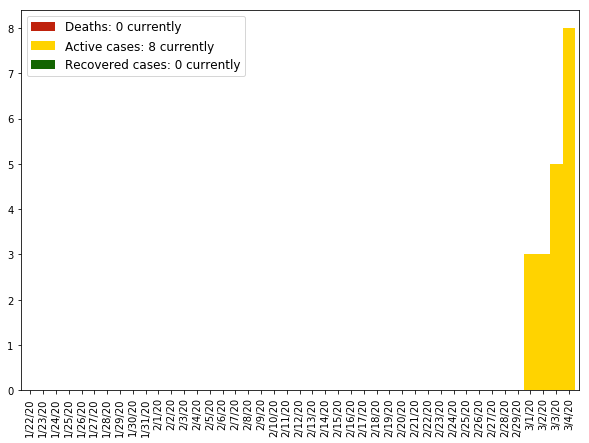

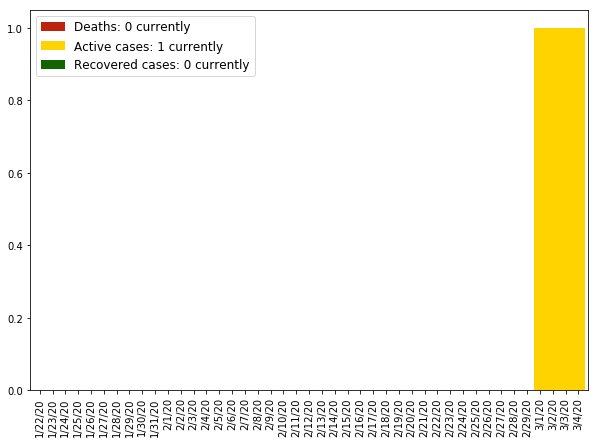

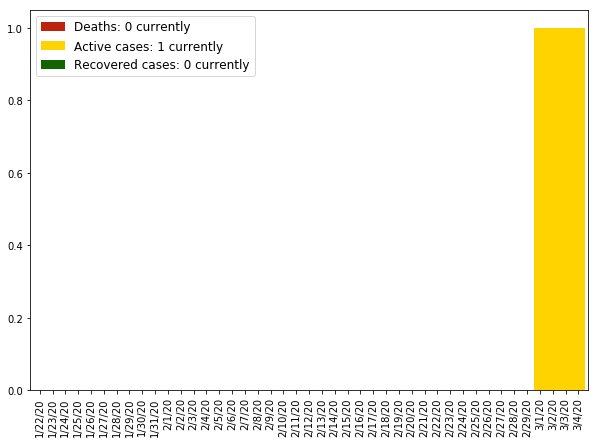

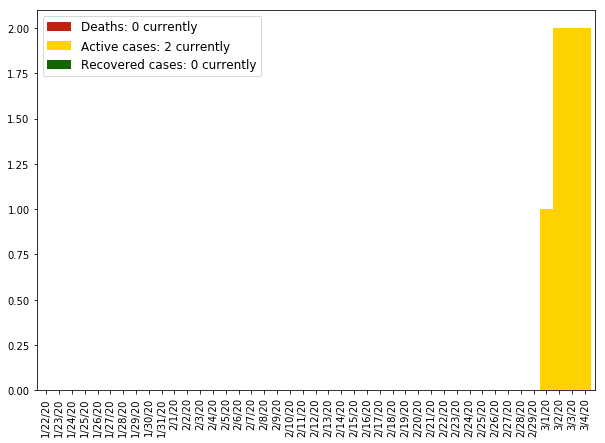

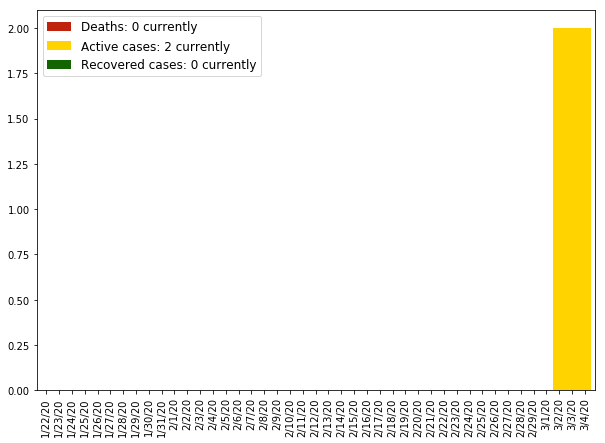

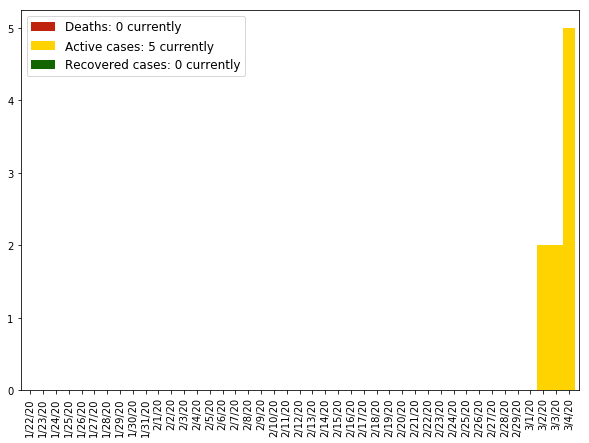

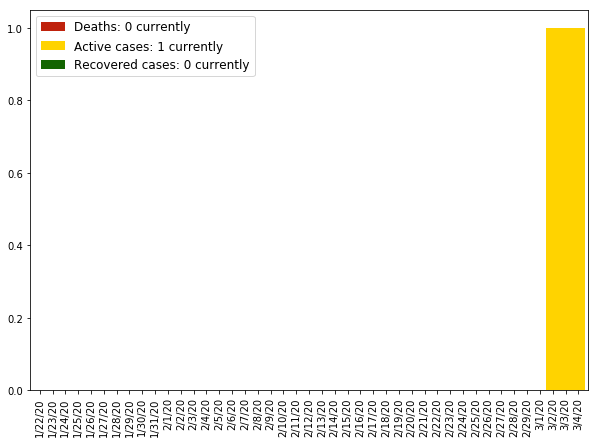

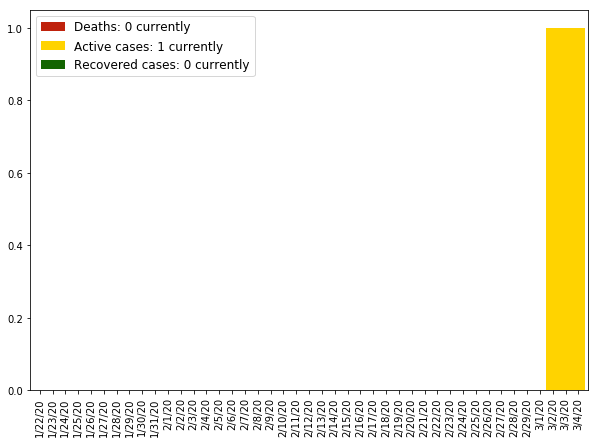

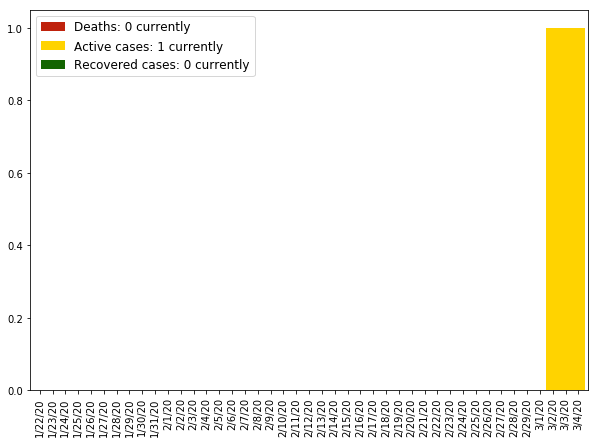

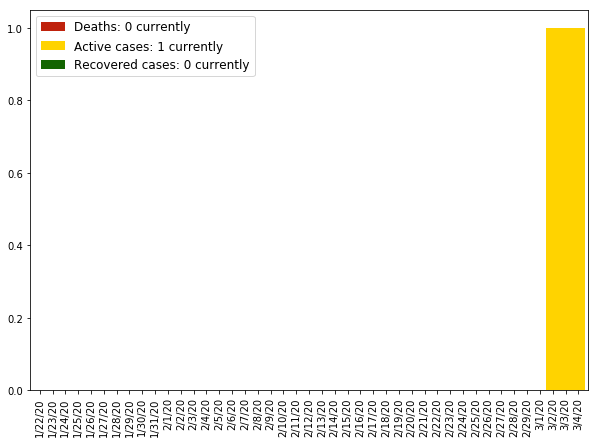

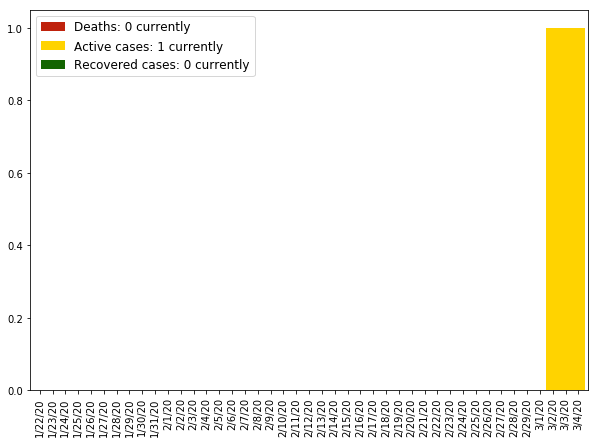

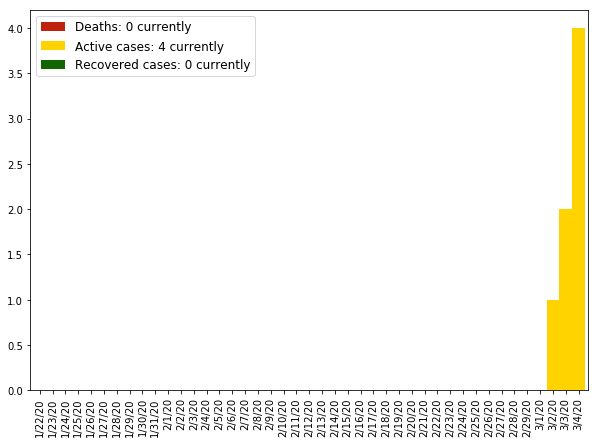

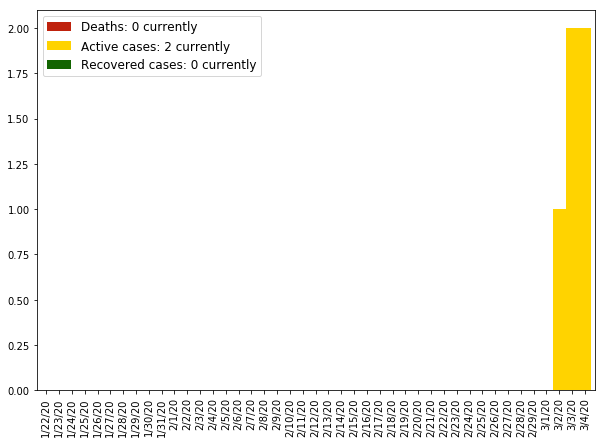

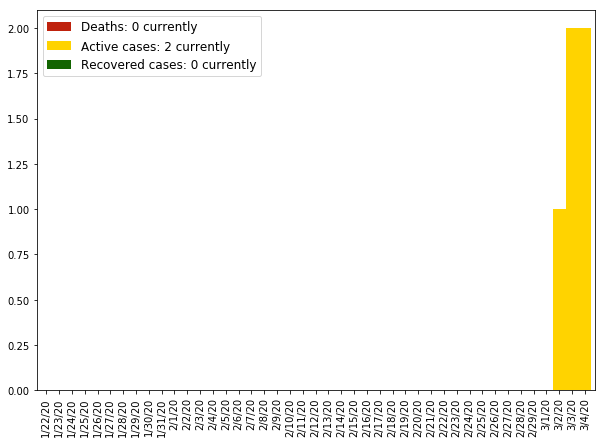

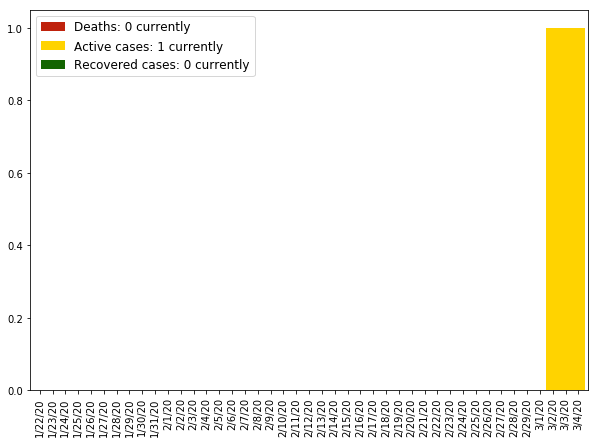

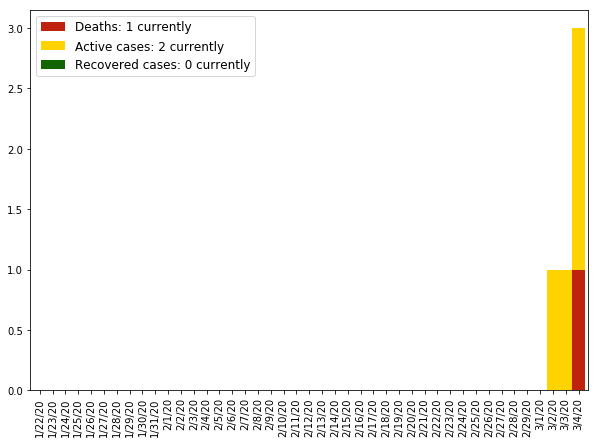

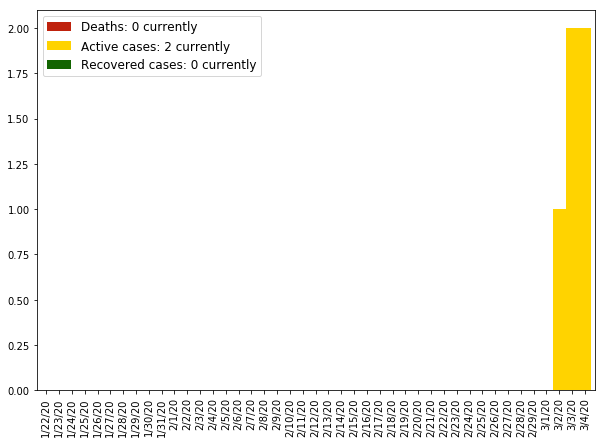

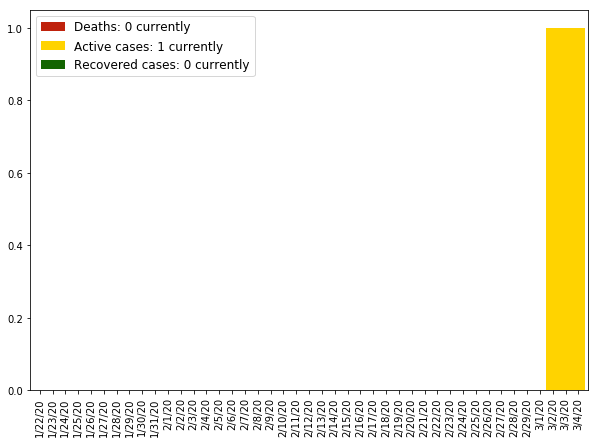

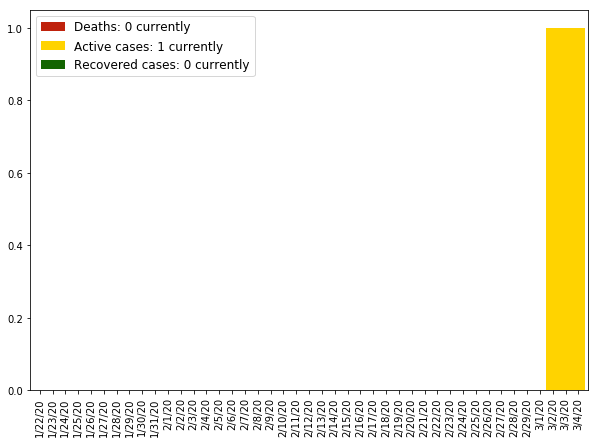

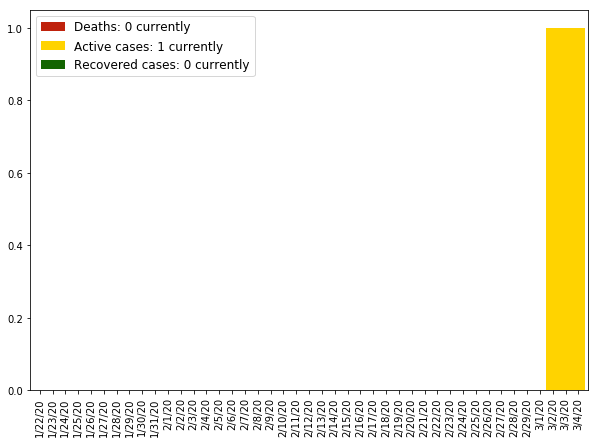

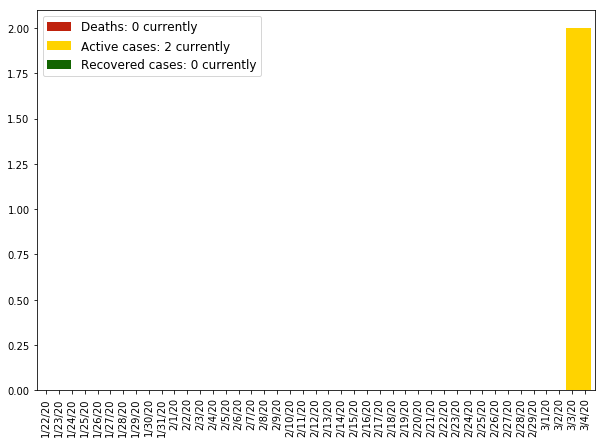

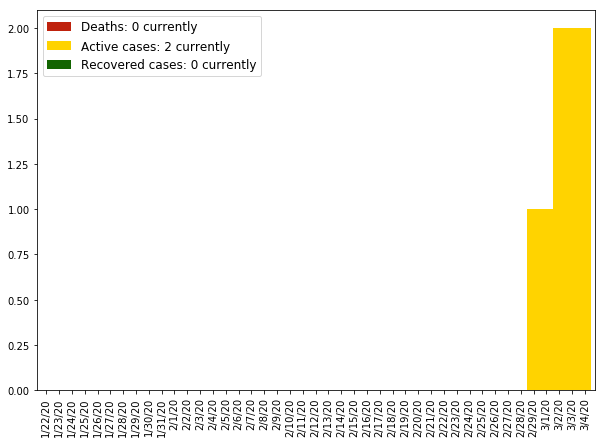

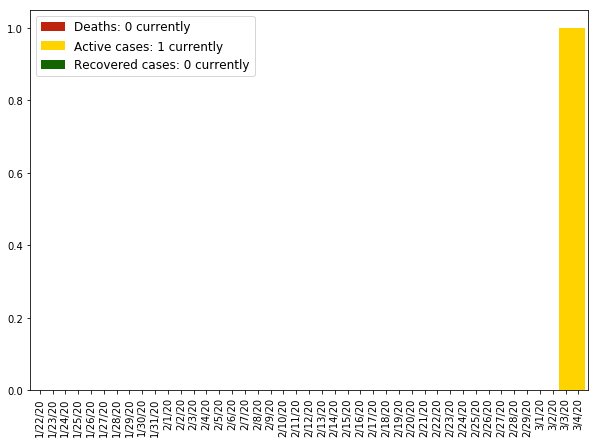

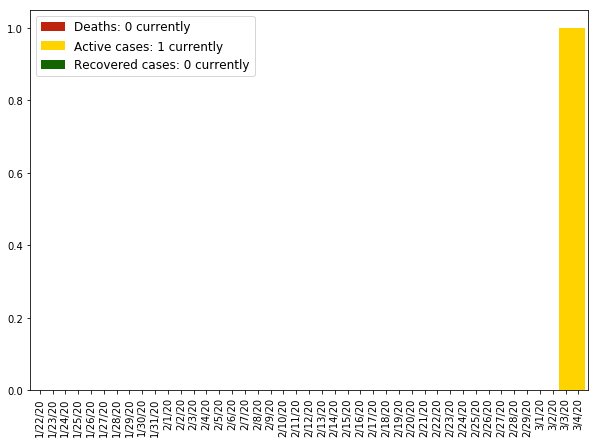

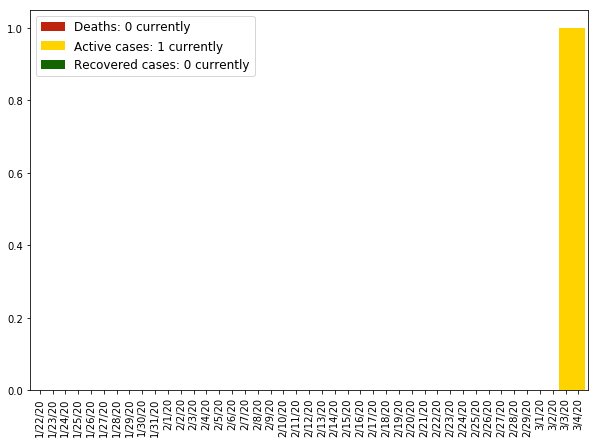

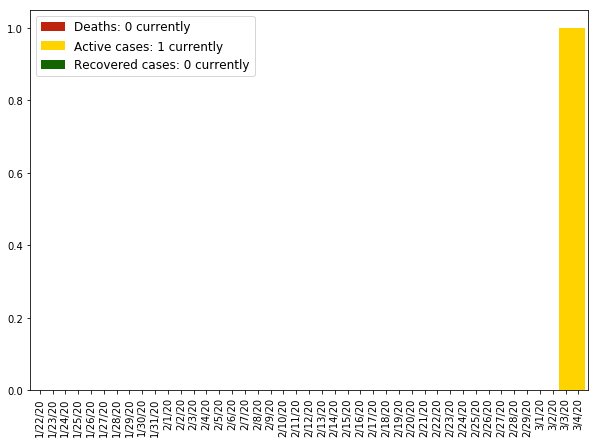

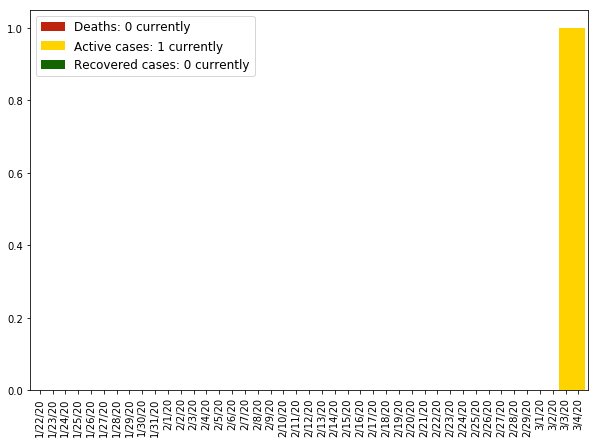

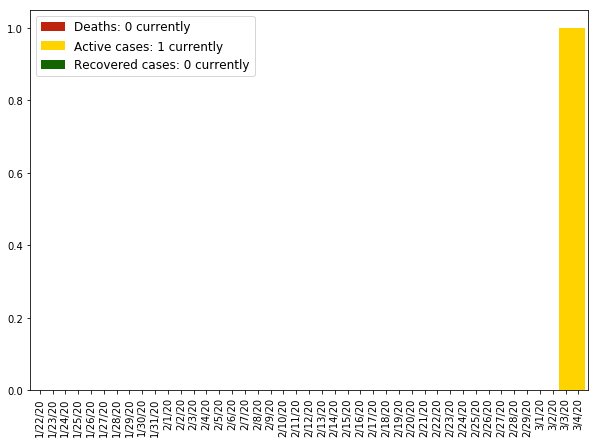

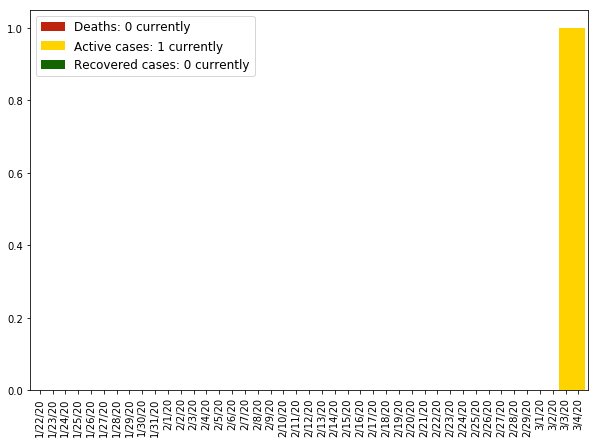

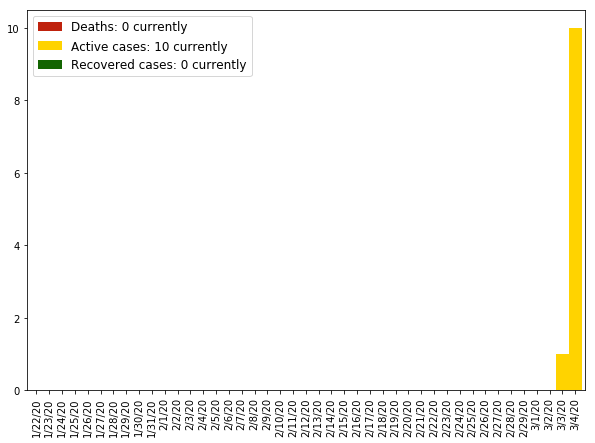

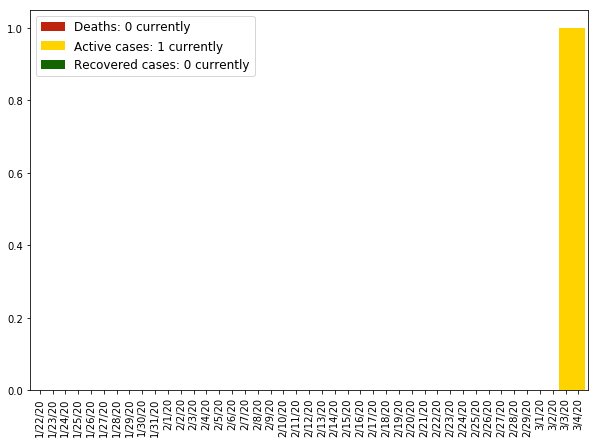

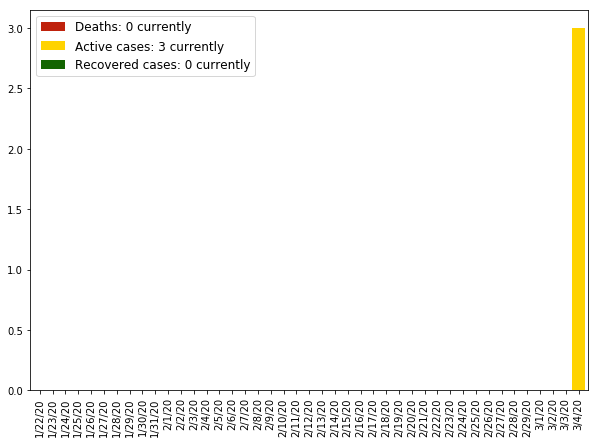

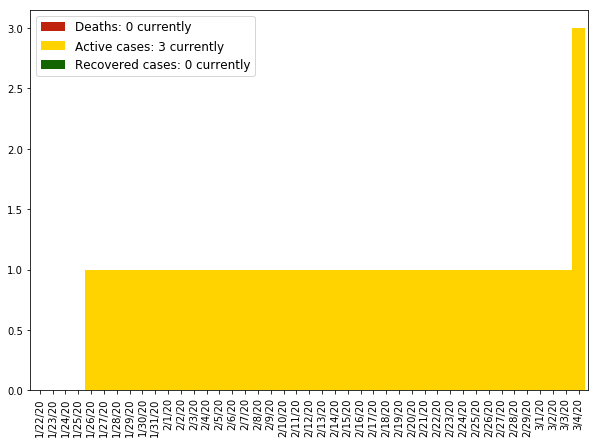

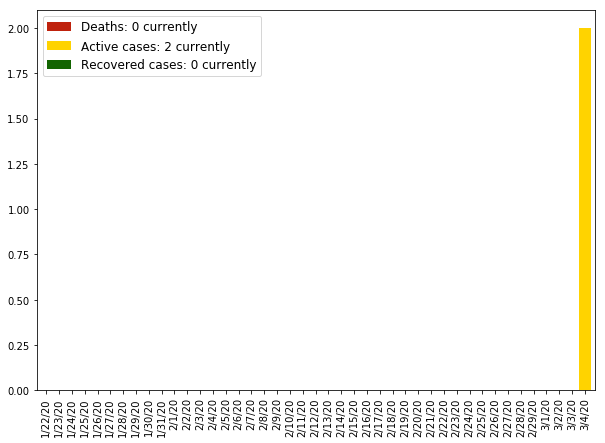

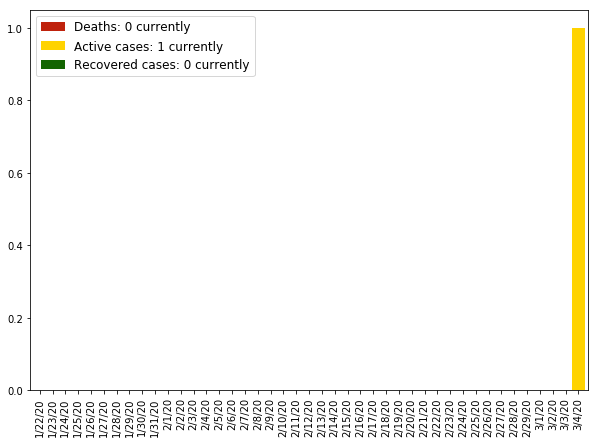

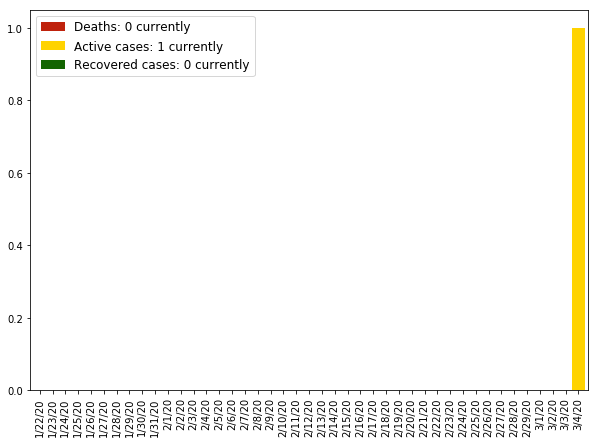

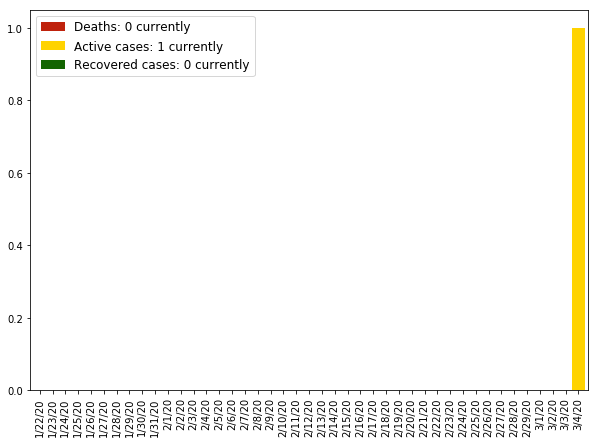

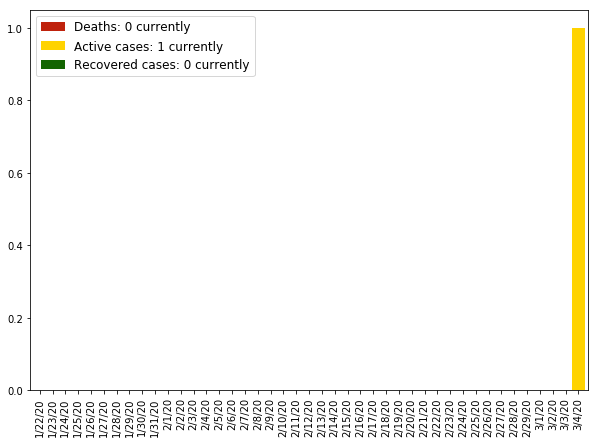

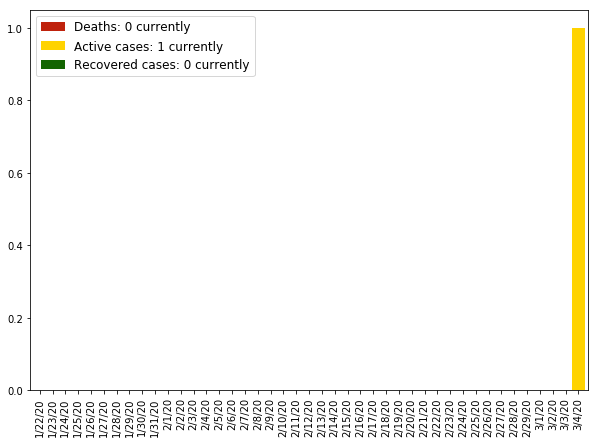

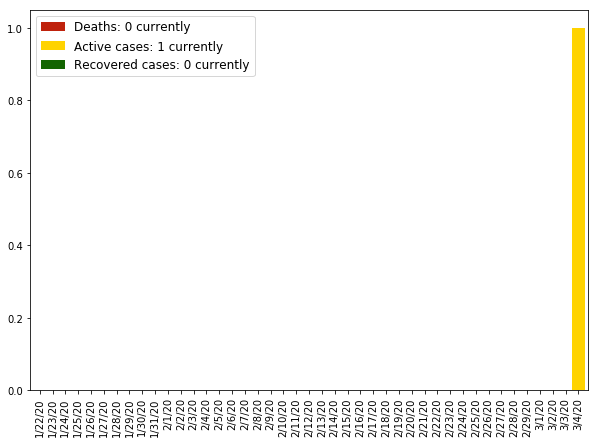

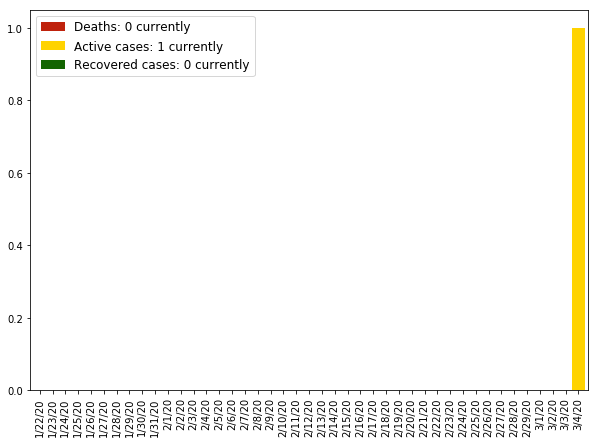

In [66]:
colors = ['#bf220d', '#ffd300', '#136501']

for province in tqdm(provinces):
    df = pd.concat([confirmed_df.loc[province], death_df.loc[province], recovered_df.loc[province]], axis=1)
    folder = df.loc['Country/Region'].values[0]
    filename = province
    df.columns = ['Active cases', 'Deaths', 'Recovered cases']
    df = df[['Deaths', 'Active cases', 'Recovered cases']]
    df_plot = df.drop(['Country/Region', 'Lat', 'Long'])
    
    fig, ax = plt.subplots(figsize=(10,10))
    df_plot.plot.bar(stacked=True, color=colors, figsize=(10,7), width=1, ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    labels = [f"{label}: {str(get_last_value(label))} currently" for label in labels]
    ax.legend(handles, labels, prop={'size': 12})
    plt.savefig(f"output/{folder}/{filename}.png")